# Data Analysis for OH<sup>-</sup>(H<sub>2</sub>O)<sub>5</sub> DMC Data

### Install necessary libraries and define constants

In [185]:
import numpy as np
import pyvibdmc as pv
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from nn_dmc import *

import h5py

au_to_cm = 219474.63136320

au_to_ang = 0.529177249

h11o6_atoms = np.array([8,1,1,8,1,1,8,1,1,8,1,1,8,1,1,8,1])
h11o6_groups = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]

h11o6_atom_names = ['O','H','H','O','H','H','O','H','H','O','H','H','O','H','H','O','H']

path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/'

### Optimized MOB-ML energies and structures for the key isomers of this complex

In [26]:
h11o6_4_1_mobml_energy = -457.86049912
energy_shift = h11o6_4_1_mobml_energy*au_to_cm

h11o6_4_1_mobml_min = np.array([-5.22071019,  0.45219087,  0.39258194, -3.79359053, 0.77731208, -0.76506451,
 -4.63783003,  1.15008802,  1.95744275,  0.13045852,  2.97610771,  2.14963861,
 -0.24565512,  2.53532275,  0.35690278,  1.45844052,  4.19441247,  2.04181715,
  4.55204562,  0.84064589, -1.95147809,  4.5837319,  -0.20433122, -0.46486598,
  2.74592397,  0.97510823, -2.30298491, -1.01837134, -3.71483304, -0.9594928,
 -2.69401462, -3.61965215, -0.27325381, -0.84004062, -2.04695746, -1.78547328,
  2.60212736, -1.9994216,   2.84261588,  1.53524363, -2.95696682,  1.70521186,
  1.7416188,  -0.38849436,  2.93411234, -0.85953764,  1.1431051,  -2.37646317,
 -1.15889846,  1.91653967, -3.98520012]).reshape(17,3)

h11o6_4_1_zpe = 29167

In [20]:
h11o6_c5_mobml_min = np.array([-4.99976143,  1.057245  ,  0.59371411, -3.58031265,  1.36848287,
       -0.60601623, -4.4786128 ,  1.76362457,  2.1785895 ,  0.11122927,
        3.93080013,  1.53538347, -0.25857121,  3.48571297, -0.24150698,
        1.64959851,  4.65021882,  2.19247899,  4.07940818,  1.83390348,
       -1.31349184,  4.49822815, -0.08698409, -1.10545191,  2.27156402,
        1.94261942, -1.70192502, -2.21347384, -3.14491978, -1.57009773,
       -3.89474416, -3.21024761, -0.93548995, -2.05006924, -1.48220658,
       -2.42431057,  2.32725425, -2.70493488, -3.38793855,  1.36315384,
       -4.22935794, -3.48285948,  1.2420602 , -1.28711127, -2.75801729,
       -0.85939069,  1.14993606, -2.38466412, -1.1462322 ,  1.93551405,
       -3.99824445]).reshape(17,3)

h11o6_c5_mobml_energy = -457.85571091

h11o6_c5_zpe = 29940

In [21]:
h11o6_c4_1_planar_mobml_min = np.array([-4.99431104,  2.85356531,  1.49841384, -3.78806373,  2.30121231,  0.1999704,
 -4.13566831,  4.31098639,  2.14685086, -0.25095006,  6.40975405,  0.3538017,
 -0.494261,    4.76417524, -0.49091439,  1.53820153,  6.52965118,  0.53783766,
  3.84723927,  2.25039946, -1.43581273,  4.43653887,  0.75193413, -0.60775798,
  1.99715772,  2.00476222, -1.61003495, -1.13982384, -2.96231938, -1.02941067,
 -2.84682627, -3.49511431, -0.7852611,  -1.22542991, -1.0830078,  -1.35947127,
  3.21907884, -4.20000279, -3.62898326,  1.62257543, -4.02975695, -2.72935147,
  3.48620193, -2.54197808, -4.30008117, -1.17129061,  1.82108788, -1.85099183,
 -1.68117426,  2.10723635, -3.56327478]).reshape(17,3)

h11o6_c4_1_planar_mobml_energy = -457.854961538757

h11o6_c4_1_planar_zpe = 29151

In [6]:
h11o6_c4_1_rotated_mobml_min = np.array([-5.04845812,  2.42349782, -0.77422458, -3.54291551,  2.50022545, -1.86801676,
 -4.37800533,  2.76867824,  0.86402186,  1.23508108,  3.60351132,  1.21491547,
  0.64696376,  3.50468305, -0.53873352,  0.70928194,  2.01423378,  1.8927728,
  3.38817222, -0.19781375, -4.0778668,   4.26918993,  0.20064136, -2.55641497,
  1.86259844,  0.93383725, -4.00549482, -3.38425664, -1.38752027, -5.54256069,
 -4.76668475, -1.35023804, -4.37166935, -2.287793,   -0.02618462, -4.91207414,
  0.72376298, -4.42918611, -2.45421359, -0.52357327, -4.06428319, -3.71392061,
  1.88443628, -3.0457136,  -2.74511358, -0.66516562,  2.5537486,  -3.54154483,
 -0.77252473,  3.7983702,  -4.84358342]).reshape(17,3)



In [22]:
h11o6_3_2_mobml_min = np.array([-5.22834269,  0.44571077,  0.38850877, -3.79846262,  0.75305581,
       -0.80831139, -4.66367366,  0.02405621,  1.91659789,  1.3068778 ,
        3.42968259,  2.04120642,  0.92702398,  2.98977328,  0.25059656,
        2.61320758,  4.6820796 ,  2.02106194, -1.44356168, -0.56816502,
        4.1468525 , -2.22331932, -1.50380615,  5.49473736,  0.13961296,
       -0.73200426,  3.75503672,  0.56744692, -3.45124437, -1.34285818,
       -1.12468932, -3.39523289, -0.70348829,  0.73287353, -1.78639577,
       -2.19257348,  3.59854851, -1.50667853,  1.99405776,  2.54988287,
       -2.51348674,  0.85750096,  2.72560849,  0.09291783,  2.17225892,
       -0.85786001,  1.1468747 , -2.38368146, -1.13470487,  1.93630773,
       -4.0062002 ]).reshape(17,3)

h11o6_3_2_mobml_energy = -457.8520851570613

h11o6_3_2_zpe = 28990

In [23]:
h11o6_3_2_up_down_mobml_min = np.array([[-5.19012673,  2.48490874,  0.50049639],
       [-4.16140358,  1.98024484, -0.94523101],
       [-4.45108731,  1.57917835,  1.8824176 ],
       [ 0.4541031 ,  1.00087936,  2.58037763],
       [ 0.02805151,  2.26507734,  1.34829982],
       [ 0.13499535, -0.57512938,  1.659691  ],
       [ 3.29150457,  2.34962092, -3.21073588],
       [ 3.64891112,  1.70686639, -1.54980549],
       [ 1.47643108,  1.99827471, -3.39986166],
       [-0.11060966, -2.69757701, -0.84596281],
       [-1.54241179, -3.81113789, -0.87347237],
       [-0.82580123, -0.97768312, -1.91210566],
       [ 3.15469913, -2.88953634, -5.10168342],
       [ 2.09084789, -3.07753297, -3.62635267],
       [ 3.48686847, -1.10703686, -5.09747675],
       [-1.69900569,  0.91067681, -3.17923094],
       [-2.18977871, -0.01829788, -4.6611643 ]])

h11o6_3_2_up_down_mobml_energy = -457.8510452237062

h11o6_3_2_up_down_zpe = 27868

In [24]:
h11o6_3_2_book_mobml_min = np.array([[-4.55830735, -0.30297528,  2.39294133],
       [-3.4110611 , -0.43614059,  0.82905158],
       [-6.03240291, -1.2998169 ,  2.09842537],
       [ 2.16414596,  2.40056691,  1.44199665],
       [ 0.82869741,  1.50611536,  0.48855338],
       [ 1.50573877,  2.50986028,  3.14001099],
       [-1.2676794 ,  1.87326783,  5.85987668],
       [-2.51859038,  1.26397435,  4.64806066],
       [-0.50547684,  0.36495257,  6.496762  ],
       [ 1.60242039, -4.15770277, -2.03695978],
       [ 0.88426855, -5.63792472, -1.28171093],
       [ 0.33584945, -2.75104714, -1.70293483],
       [ 5.9212046 , -1.49297801,  0.11248176],
       [ 4.65726321, -2.5995253 , -0.59982284],
       [ 4.99584005,  0.06382539,  0.4069089 ],
       [-1.33965098, -0.40487889, -1.13577576],
       [-1.8893165 ,  0.2100114 , -2.73679273]])

h11o6_3_2_book_mobml_energy = -457.85459788929717

h11o6_3_2_book_zpe = 28285

### Relative Energy Analysis of the various isomers

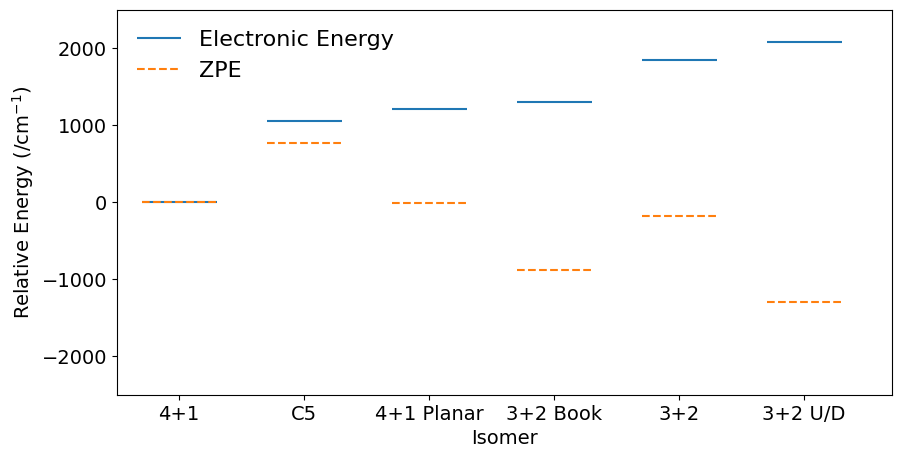

In [46]:
plt.rcParams["figure.figsize"] = [10, 5]

energy_list = [h11o6_c5_mobml_energy, h11o6_c4_1_planar_mobml_energy, h11o6_3_2_book_mobml_energy, h11o6_3_2_mobml_energy, h11o6_3_2_up_down_mobml_energy]
zpe_list = [h11o6_c5_zpe, h11o6_c4_1_planar_zpe, h11o6_3_2_book_zpe, h11o6_3_2_zpe, h11o6_3_2_up_down_zpe]

for i, energy in enumerate(energy_list):
    plt.hlines((energy-h11o6_4_1_mobml_energy)*au_to_cm, 5*(i+1), 5*(i+1)+3)
plt.hlines(0, 0, 3, label='Electronic Energy')

for i, zpe in enumerate(zpe_list):
    plt.hlines((zpe-h11o6_4_1_zpe), 5*(i+1), 5*(i+1)+3, color='tab:orange', linestyle='dashed')
plt.hlines(0, 0, 3, label='ZPE', color='tab:orange', linestyle='dashed')

plt.legend(fontsize=16, frameon=False, loc='upper left')
plt.xlabel('Isomer')
plt.xlim(-1,30)
plt.xticks(np.arange(1.5,26.5+5,5), ['4+1', 'C5', '4+1 Planar', '3+2 Book', '3+2', '3+2 U/D'])
plt.ylabel(r'Relative Energy (/cm$^{-1}$)')
plt.ylim(-2500,2500)
plt.show()

### Load in training data generated from MOB-ML DMC simulations

In [136]:
#Dictionaries for the starting timesteps of the various simulation types for each of the starting isomers
#MOB-ML has holes and has to be restarted every time it fails to converge

train_4_1_dict = {'min_starts': [[0], [0, 34]], 'reg_starts': [[0], [0], [0], [0, 528], [0]], 'wide_starts': [[0, 279, 906, 915], [0, 298, 451, 939]], 'test_starts': [[0, 988]]}
train_c5_dict = {'min_starts': [[0, 45, 374, 698, 812], [0, 944]], 'reg_starts': [[0], [0, 128, 411], [0], [0], [0]], 'wide_starts': [[0, 88, 647], [0, 198, 875]], 'test_starts': [[0, 603, 941]]}
train_3_2_dict = {'min_starts': [[0, 82], [0, 68]], 'reg_starts': [[0, 815], [0], [0, 978], [0, 728, 921], [0]], 'wide_starts': [[0, 249, 313, 877], [0, 683]], 'test_starts': [[0, 473]]}

In [153]:
isomer = 'c5'
sim_type = 'reg'
sim_num = 2

if isomer == '3_2':
    train_dict = train_3_2_dict
elif isomer == '4_1':
    train_dict = train_4_1_dict
elif isomer == 'c5':
    train_dict = train_c5_dict
else:
    print("Not a valid isomer name")


train_energies_list = []
train_cds_list = []

if sim_type == 'min':
    sim = '500w_1000ts_1dt'
    starts = train_dict['min_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'wide':
    sim = '1000w_1000ts_10dt'
    starts = train_dict['wide_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'reg':
    if sim_num in [1, 2]:
        sim = '200w_5000ts_10dt'
        end = 1000
    else:
        sim = '200w_1000ts_10dt'
        end = 1000

    starts = train_dict['reg_starts'][sim_num - 1]

elif sim_type == 'test':
    sim = '1000w_1000ts_10dt_min'
    starts = train_dict['test_starts'][sim_num - 1]
    end = 1000

else:
    print("Not a valid sim type")

print(f'starting {isomer} {sim_type} sim number {sim_num}')

for j in range(len(starts)):
    print(f'starting at timestep {starts[j]}')

    path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/mobml_pyscf/{isomer}_min/sim_{sim_num}/{sim}_{starts[j]}_start'

    training_sim = pv.SimInfo(f'{path}/h11o6_0_sim_info.hdf5')
    
    if j+1 < len(starts):
        for b in range(starts[j+1]-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift) #record energy relative to 4+1 minimum
            
            #print(f'snapshot {b+starts[j]} done')
    else:
        for b in range(end-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift)
            
            #print(f'snapshot {b+starts[j]} done')
     


starting c5 reg sim number 2
starting at timestep 0
starting at timestep 128
starting at timestep 411


In [154]:
train_energies = np.concatenate(train_energies_list)
train_cds = np.concatenate(train_cds_list)

In [155]:
#check energy range of simulation
print(np.min(train_energies), np.max(train_energies))

2029.4096198827028 94490.35169012845


In [156]:
np.save(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_cds.npy',train_cds)
np.save(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_energies.npy',train_energies)

In [35]:
import random

# Generate list of indices
indices = list(range(len(train_cds)))

# Shuffle the indices randomly
random.shuffle(indices)

split_idx = 100000

# Partition the data
test_indices = indices[:split_idx]
train_indices = indices[split_idx:]

In [150]:
def make_training_set(isomers, sim_types, sim_nums):
    """
    Function that takes in specified MOB-ML simulations for the isomers of OH-W5
    to form a training data set for NN training

    example input:
    isomers = ['c5']
    sim_types = ['min', 'wide', 'reg']
    sim_nums = [[1], [1], [1,2,3,4,5]]

    Returns coordinates array and energies array 
    """
    path = f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning/h11o6/training_data'

    total_cds = []
    total_energies = []

    for isom in isomers:
        for i, sim in enumerate(sim_types):
            for num in sim_nums[i]:
                cds = np.load(f'{path}/h11o6_{isom}_mobml_{sim}_sim_{num}_training_cds.npy')
                energies = np.load(f'{path}/h11o6_{isom}_mobml_{sim}_sim_{num}_training_energies.npy')

                total_cds.append(cds)
                total_energies.append(energies)

    total_cds = np.concatenate(total_cds)
    total_energies = np.concatenate(total_energies)

    return total_cds, total_energies

In [199]:
h11o6_c5_snapshot_cds = np.load(f'{path}/h11o6/training_sets/h11o6_3_2_unguided_100k_75kts_snapshot.npy')
h11o6_c5_dmc_cds = []
h11o6_c5_dmc_energies = []
for i in np.arange(0, len(h11o6_c5_snapshot_cds), 1000):
    try:
        energy = np.load(f'{path}/h11o6/training_sets/h11o6_snapshots/{i}-{i+1000}_3_2_energies.npy')
        h11o6_c5_dmc_energies.append(energy)
        h11o6_c5_dmc_cds.append(h11o6_c5_snapshot_cds[i:i+1000])
    except:
        print(f'Skipping {i}-{i+1000}')
        continue
h11o6_c5_dmc_energies = np.concatenate(h11o6_c5_dmc_energies)*au_to_cm - energy_shift
h11o6_c5_dmc_cds = np.concatenate(h11o6_c5_dmc_cds)

Skipping 0-1000
Skipping 50000-51000
Skipping 63000-64000
Skipping 65000-66000
Skipping 66000-67000
Skipping 67000-68000
Skipping 68000-69000
Skipping 69000-70000
Skipping 70000-71000
Skipping 71000-72000
Skipping 72000-73000
Skipping 73000-74000
Skipping 74000-75000
Skipping 75000-76000
Skipping 76000-77000
Skipping 77000-78000
Skipping 78000-79000
Skipping 79000-80000
Skipping 80000-81000
Skipping 81000-82000
Skipping 82000-83000
Skipping 83000-84000
Skipping 84000-85000
Skipping 85000-86000
Skipping 86000-87000
Skipping 87000-88000
Skipping 88000-89000
Skipping 89000-90000
Skipping 90000-91000
Skipping 91000-92000
Skipping 92000-93000
Skipping 93000-94000
Skipping 94000-95000
Skipping 95000-96000
Skipping 96000-97000
Skipping 97000-98000
Skipping 98000-99000
Skipping 99000-100000


In [201]:
np.save(f'{path}/h11o6/training_data/h11o6_3_2_dmc_energies.npy', h11o6_c5_dmc_energies)

In [214]:
def plot_training_data(isomer):

    _, train_min_energies = make_training_set([isomer], ['min'], [[1]])
    _, train_wide_energies = make_training_set([isomer], ['wide'], [[1]])
    _, train_reg_energies = make_training_set([isomer], ['reg'], [[1,2,3,4,5]])
    _, train_test_energies = make_training_set([isomer], ['test'], [[1]])

    dmc_energies = np.load(f'{path}/h11o6/training_data/h11o6_{isomer}_dmc_energies.npy')

    n, bins = np.histogram(train_min_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} min')

    n, bins = np.histogram(train_wide_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} wide')

    n, bins = np.histogram(train_reg_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} reg')

    n, bins = np.histogram(train_test_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} test')

    n, bins = np.histogram(dmc_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} DMC')

    plt.xlabel(r'MOB-ML Energy (/cm$^{-1}$)')
    plt.ylabel('Number of Configurations')
    plt.xlim(0, 80000)
    #plt.ylim(0, 6000)
    plt.legend()
    plt.show()

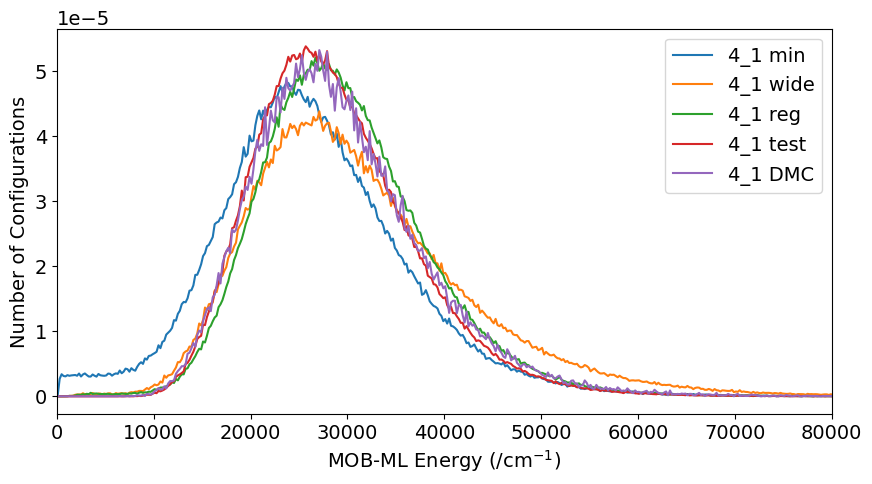

In [215]:
plot_training_data('4_1')

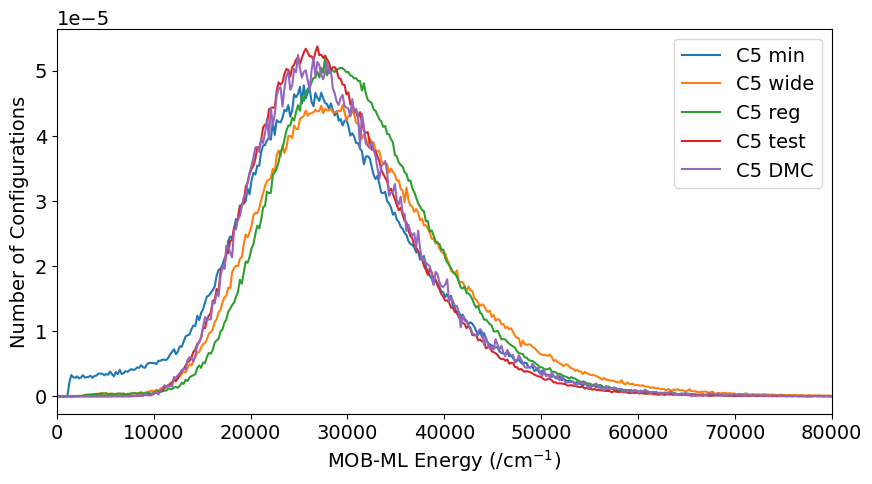

In [216]:
plot_training_data('C5')

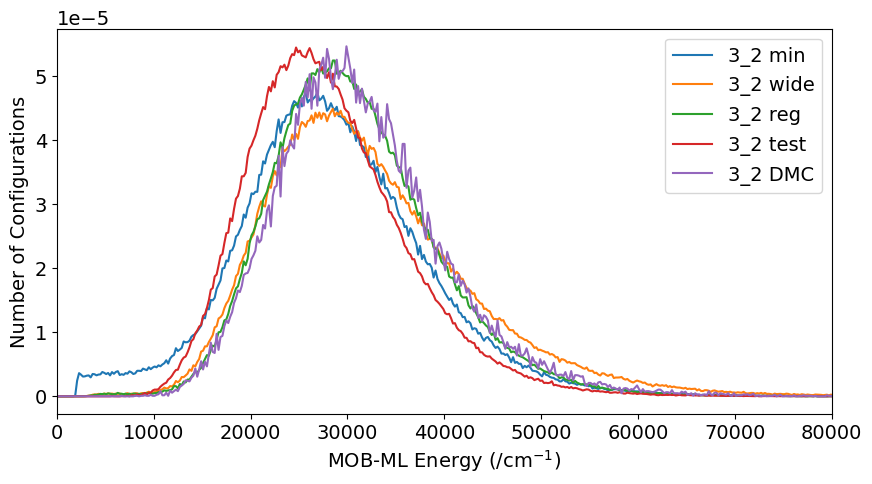

In [217]:
plot_training_data('3_2')

In [183]:
np.save('./h11o6/training_sets/h11o6_mobml_wide_training_cds_4_1_2.npy',train_cds)
np.save('./h11o6/training_sets/h11o6_mobml_wide_training_y_4_1_2.npy',train_y)
np.save('./h11o6/training_sets/h11o6_mobml_wide_training_molec_atom_sort_revised_X_4_1_2.npy',train_x)

FileNotFoundError: [Errno 2] No such file or directory: './h11o6/training_sets/h11o6_mobml_wide_training_cds_4_1_2.npy'

In [48]:
min_cds = np.load('./h11o6/training_sets/h11o6_mobml_min_training_molec_atom_sort_revised_X_3_2.npy')
wide_cds = np.load('./h11o6/training_sets/h11o6_mobml_wide_training_molec_atom_sort_revised_X_3_2.npy')
equil_cds = np.load('./h11o6/training_sets/h11o6_mobml_5_reg_no_B_training_molec_atom_sort_revised_X_3_2.npy')
#equil_cds_2 = np.load('./h11o6/training_sets/h11o6_mobml_45_test_cds_3_2.npy')


full_train_cds = np.concatenate([min_cds,wide_cds,equil_cds])

In [14]:
full_cds_c5 = np.load('./h11o6/training_sets/h11o6_mobml_full_training_molec_atom_sort_revised_X_c5_5_reg.npy')
full_cds_4_1 = np.load('./h11o6/training_sets/h11o6_mobml_full_training_molec_atom_sort_revised_X_4_1_5_reg.npy')

full_train_cds = np.concatenate([full_cds_c5,full_cds_4_1])

In [15]:
full_train_cds.shape

(4059551, 136)

In [16]:
np.save('./h11o6/training_sets/h11o6_mobml_full_training_4mill_molec_atom_sort_revised_X_c5_and_4_1_5_reg.npy',full_train_cds)

In [2]:
standardize_inputs('./h11o6/training_sets/h11o6_mobml_full_training_4mill_molec_atom_sort_revised_X_c5_and_4_1_5_reg')

In [9]:
train_cds = np.load('./h11o6/training_sets/h11o6_mobml_full_training_cds_c5.npy')

In [2]:
test_x = np.load('./h11o6/training_sets/h11o6_mobml_10_test_molec_atom_sort_revised_X_4_1_new.npy')
train_x = np.load('./h11o6/training_sets/h11o6_mobml_full_training_4mill_molec_atom_sort_revised_X_c5_and_4_1_5_reg.npy')

means = np.mean(train_x,axis=0)
stds = np.std(train_x,axis=0)

with np.errstate(divide='ignore', invalid='ignore'):
    standard_X_test = (test_x - means)/stds

In [3]:
np.save('./h11o6/training_sets/h11o6_mobml_10_test_molec_atom_sort_revised_X_4_1_new_5_reg_c5_and_4_1_4mill_standardized.npy',standard_X_test)

In [120]:
train_y = np.load('./h11o6/training_sets/h11o6_mobml_90_test_y_4_1_new.npy')

In [121]:
train_energies = 10**train_y - 100

In [122]:
print(np.min(train_energies), np.max(train_energies))

7154.1298427581805 108562.40750607853


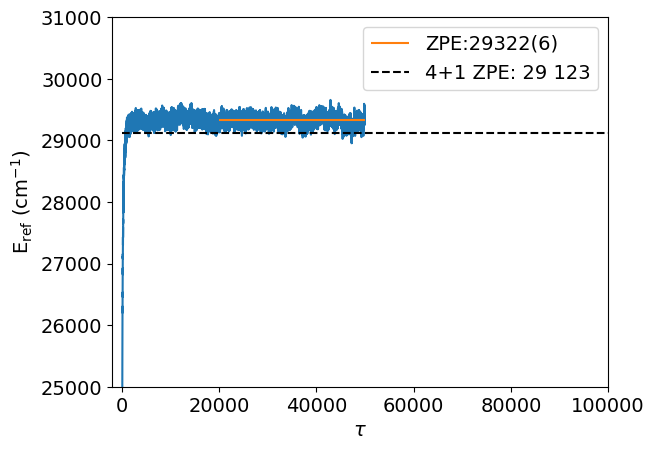

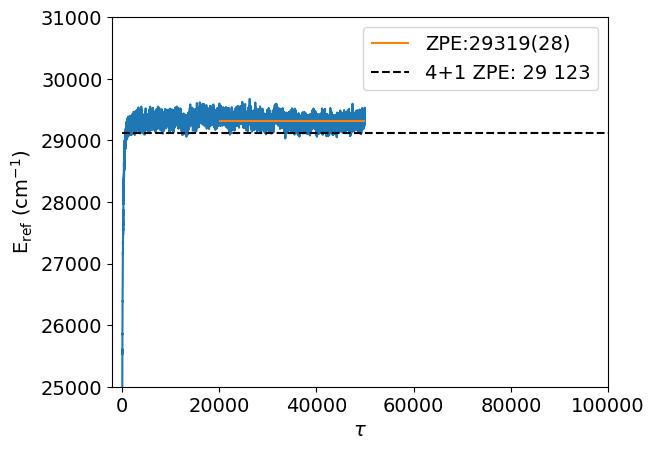

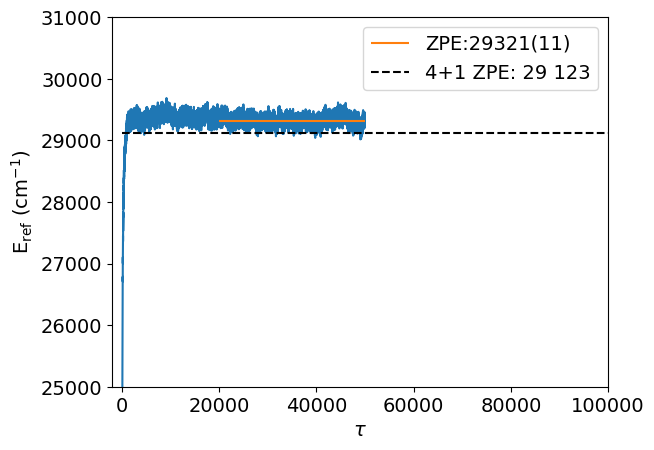

29320.732362312676 1.0838249345462165


In [151]:
import numpy as np
import pyvibdmc as pv
ZPEs = []
ZPEs_2 = []
walkers = 100000
timesteps = 50000
tau = np.linspace(0,timesteps,timesteps)
for i in range(3):
    tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c4_1_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_50000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    #tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c4_1_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    #ZPE = tutorial_sim.get_zpe(onwards=20000, ret_cm=True)
    #ZPEs.append(ZPE)

    vref = tutorial_sim.get_vref(ret_cm=True)

    means = []
    for j in range(20000,50000,10000):
        mean = np.mean(vref[j:j+10000,1])
        means.append(mean)

    std = np.std(means)
    
    plt.plot(tau,vref[:,1],
             #label=f'ZPE: {ZPE:.0f}({std:.0f})'
             )
    
    ZPE = np.mean(vref[20000:50000,1])
    ZPEs.append(ZPE)
    #plt.hlines(ZPE_1,20000,50000,color='black',label=f'ZPE: {ZPE_1:.0f}({std:.0f})')

    """tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided/1.0w_100000_walkers_50000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    ZPE = tutorial_sim.get_zpe(onwards=35000, ret_cm=True)
    ZPEs.append(ZPE)

    tau = np.linspace(0,50000,50000)

    means = []
    for j in range(35000,50000,5000):
        mean = np.mean(vref[j:j+5000,1])
        means.append(mean)

    std = np.std(means)

    vref = tutorial_sim.get_vref(ret_cm=True)"""
    
    #plt.plot(tau,vref[:,1],
    #         label=f'ZPE: {ZPE:.0f}({std:.0f})'
    #         )
    
    plt.hlines(ZPE,20000,50000,color='tab:orange',label=f'ZPE:{ZPE:.0f}({std:.0f})')
    plt.hlines(29123, 0,100000,color='black',linestyle='dashed',label='4+1 ZPE: 29 123')

    plt.ylabel(r'E$_\mathrm{ref}$ (cm$^{-1}$)')
    plt.xlabel(r'$\tau$')
    #plt.xticks(np.arange(0,200000,50000))
    plt.xlim(-2000,100000)
    plt.ylim(25000,31000)
    plt.legend()
    plt.show()

print(np.mean(ZPEs), np.std(ZPEs))


In [10]:
np.std([28940,28946])

np.float64(3.0)

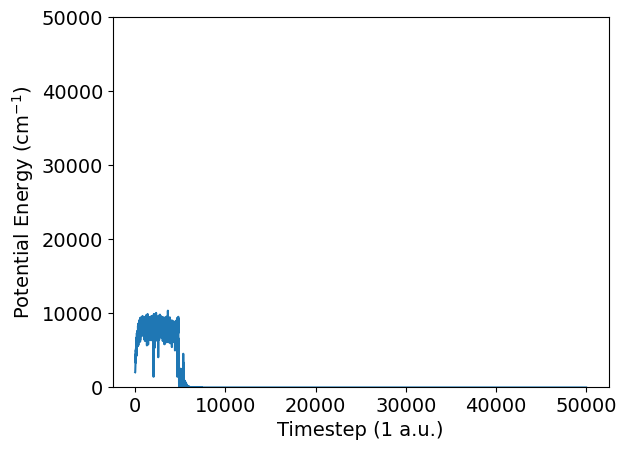

In [12]:
highest, lowest, average, num_walkers, local = parse_log_file('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided/1.0w_100000_walkers_50000t_1dt/H11O6_1_log.txt')

vref = []
for i in range(len(average)):
    v = average[i] - (0.5)*(num_walkers[i] - 100000)/100000
    vref.append(v)
#plt.plot(np.arange(0,len(vref),1),vref)
plt.plot(np.arange(0,len(lowest),1),lowest)
#plt.hlines(1000, 0, 50000, color='black', linestyle='dashed')
plt.ylim(0,50000)
#plt.xlim(-2000,52000)
plt.xlabel('Timestep (1 a.u.)')
plt.ylabel('Potential Energy (cm$^{-1}$)')
plt.show()

In [67]:
filename = 'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_100000t_1dt/wfns/H11O6_2_wfn_149500ts.hdf5'

with h5py.File(filename, "r") as f:
    coords = np.array(f['coords'])
    weights = np.array(f['desc_wts'])

In [68]:
np.max(weights)

np.float64(400.0)

In [69]:
np.argmax(weights)

np.int64(99717)

In [70]:
max_wt_c5_guided_long_2 = coords[99717]

In [26]:
max_wt_c5_guided

array([[-4.93506992,  1.98412784, -0.87744194],
       [-3.40944987,  2.53067722, -1.71901801],
       [-4.40866907,  2.90112583,  0.77431366],
       [ 1.08700318,  3.75094221,  1.36151494],
       [ 0.89048986,  3.16800864, -0.43762909],
       [ 0.78353092,  1.97860735,  1.95637344],
       [ 3.09304388, -0.26823781, -3.92910146],
       [ 4.26016271,  0.20301423, -2.56200391],
       [ 1.82625613,  0.78073804, -3.71440436],
       [-3.3728941 , -1.45003619, -5.47985859],
       [-4.90842317, -1.24985767, -4.3692891 ],
       [-2.43523834, -0.02200657, -4.97886566],
       [ 0.66085562, -4.38427666, -2.46618876],
       [-0.50736458, -4.42675585, -3.63559605],
       [ 1.82188667, -2.82889896, -2.6857597 ],
       [-1.0804172 ,  2.73862525, -3.83502028],
       [-0.71086105,  3.73115967, -5.24739435]])

In [71]:
save_xyz_file('./h11o6/geometries/max_wt_c5_guided_long_2.xyz',h11o6_atom_names,max_wt_c5_guided_long_2*au_to_ang)

In [24]:
read_xyz_file('./h11o6/geometries/max_weight_c5_isom.xyz')

array([[-5.0310797 ,  2.84215724,  1.71404212],
       [-4.07006336,  2.45998761,  0.17929295],
       [-4.43725009,  4.32620694,  2.57517057],
       [-0.3009207 ,  6.35809579,  0.31664051],
       [-0.31839459,  4.75402491, -0.5020875 ],
       [ 1.49629115,  6.48193154,  0.75720819],
       [ 3.90860787,  2.08972961, -1.50676537],
       [ 4.95622789,  0.841096  , -0.53581326],
       [ 1.89328562,  1.94055785, -1.26414171],
       [-1.07904382, -2.94034682, -1.18648605],
       [-2.80465991, -3.29641326, -1.00386098],
       [-1.38604957, -1.04709505, -1.31459321],
       [ 3.1463758 , -4.15812388, -3.43111861],
       [ 1.74815821, -3.64446511, -2.14392753],
       [ 3.14604629, -2.67660637, -4.66173853],
       [-1.26165   ,  1.93326375, -1.78553717],
       [-1.37014582,  2.08231372, -3.64959763]])

In [7]:
test_x = np.load('./h11o6/training_sets/h11o6_mobml_10_test_no_sort_revised_X_c5.npy')
train_x = np.load('./h11o6/training_sets/h11o6_mobml_full_training_no_sort_revised_X_c5.npy')

means = np.mean(train_x,axis=0)
stds = np.std(train_x,axis=0)

with np.errstate(divide='ignore', invalid='ignore'):
    standard_X_test = (test_x - means)/stds

In [8]:
np.save('./h11o6/training_sets/h11o6_mobml_10_test_no_sort_revised_X_c5_standardized.npy',standard_X_test)

In [71]:
snapshots = np.arange(50000,100000,1000)

tutorial_sim = pv.SimInfo(f'../H11O6-/Data/NN_Data/4_1_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/h2o_guided/1.0w_50000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)
coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

np.save('h11o6_4+1_h2o_guided_sim_0_50k_walkers_50k-100k_timestep_cds.npy',coords)
np.save('h11o6_4+1_h2o_guided_sim_0_50k_walkers_50k-100k_timestep_dws.npy',weights)

In [2]:
snapshots = np.arange(10000,50000,500)

tutorial_sim = pv.SimInfo(f'../H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided/1.0w_100000_walkers_50000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)
coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

In [3]:
np.argmax(weights)

np.int64(4466182)

In [4]:
max_weight_cd_3_2 = coords[4466182]

In [10]:
(max_weight_cd_3_2/au_to_ang).reshape(3*17)

array([-5.05740895,  1.58903369,  1.223907  , -3.72966023,  1.4229411 ,
       -0.06973482, -6.08117107,  0.09165437,  0.68492024,  1.59448882,
        2.75633334,  0.81151988,  0.6384357 ,  1.58062347, -0.30655967,
        0.31370917,  3.73425637,  1.73054963, -2.70175087, -1.88495171,
        4.78734695, -3.73551884, -0.82332492,  3.69598216, -1.14915656,
       -2.19731869,  4.13922874, -1.23712621, -4.27712576, -1.53733657,
       -2.65786862, -4.70291749, -0.18462406, -1.43659333, -2.55774652,
       -1.78176333,  1.91348587, -2.53077854,  2.49275546,  1.19787795,
       -3.48587633,  0.83801261,  2.4019785 , -0.9695565 ,  2.00601567,
       -1.57139113,  0.70379708, -2.07311403, -1.70126091,  0.9648835 ,
       -3.58865184])

In [5]:
save_xyz_file('./h11o6/geometries/max_weight_3_2_isom.xyz',h11o6_atom_names,max_weight_cd_3_2)

In [77]:
snapshots = np.arange(50000,100000,1000)

tutorial_sim = pv.SimInfo(f'../H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/h2o_guided/1.0w_50000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)
coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

np.save('h11o6_c5_h2o_guided_sim_0_50k_walkers_50k-100k_timestep_cds.npy',coords)
np.save('h11o6_c5_h2o_guided_sim_0_50k_walkers_50k-100k_timestep_dws.npy',weights)

In [49]:
snapshots = np.arange(50000,100000,500)
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/4_1_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/all_d/d2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)

np.save(f'd11o6_4_1_d2o_guided_dist_65_sim_0_100k_walkers_50k-100k_timesteps_cds.npy',coords)
np.save(f'd11o6_4_1_d2o_guided_dist_65_sim_0_100k_walkers_50k-100k_timesteps_dws.npy',weights)

In [50]:
snapshots = np.arange(50000,100000,500)
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/all_d/d2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)

np.save(f'd11o6_c5_d2o_guided_dist_65_sim_0_100k_walkers_50k-100k_timesteps_cds.npy',coords)
np.save(f'd11o6_c5_d2o_guided_dist_65_sim_0_100k_walkers_50k-100k_timesteps_dws.npy',weights)

In [4]:
snapshots = np.arange(50000,100000,500)
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/all_d/d2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_1_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)

np.save(f'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps_cds.npy',coords)
np.save(f'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps_dws.npy',weights)

In [300]:
snapshots = np.arange(50000,100000,500)
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H9O5-/Data/NN_Data/c4_start/360_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/h2o_guided/1.0w_50000_walkers_100000t_1dt/H9O5_1_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)

np.save(f'h9o5_c4_h2o_guided_sim_1_50k_walkers_50k-100k_timesteps_cds.npy',coords)
np.save(f'h9o5_c4_h2o_guided_sim_1_50k_walkers_50k-100k_timesteps_dws.npy',weights)

In [296]:
snapshots = np.arange(50000,100000,500)
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H9O5-/Data/NN_Data/3_1_start/360_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/h2o_guided/1.0w_50000_walkers_100000t_1dt/H9O5_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns(snapshots)

np.save(f'h9o5_3_1_h2o_guided_sim_0_50k_walkers_50k-100k_timesteps_cds.npy',coords)
np.save(f'h9o5_3_1_h2o_guided_sim_0_50k_walkers_50k-100k_timesteps_dws.npy',weights)

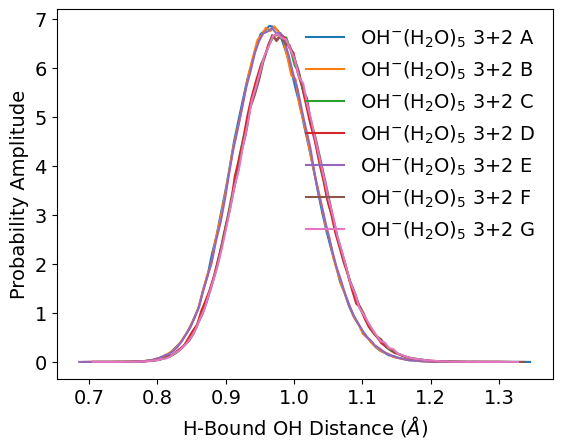

<Figure size 640x480 with 0 Axes>

In [2]:
plot_mult_dists([r'OH$^{-}$(H$_2$O)$_5$ 3+2 A', r'OH$^{-}$(H$_2$O)$_5$ 3+2 B', r'OH$^{-}$(H$_2$O)$_5$ 3+2 C', r'OH$^{-}$(H$_2$O)$_5$ 3+2 D',
                 r'OH$^{-}$(H$_2$O)$_5$ 3+2 E', r'OH$^{-}$(H$_2$O)$_5$ 3+2 F', r'OH$^{-}$(H$_2$O)$_5$ 3+2 G'],
                ['d11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps',
                 'd11o6_3_2_d2o_guided_dist_65_sim_1_100k_walkers_50k-100k_timesteps'
                 ],
              'bond_length',
              [[[0,2]],[[3,5]],[[6,7]],[[6,8]],[[9,10]],[[12,13]],[[12,14]]],
              'H-Bound OH',
              cumulative=True,
              #xlims=[0.5,2],
              #ylims=[0,6],
              bins=100,
              #colors=['tab:purple','tab:red','tab:red','tab:red','tab:orange','tab:green','tab:blue'],
              #linestyles=['solid','solid','dashed','dotted','solid','solid','solid']
              )

In [4]:
free_oh = np.load('free_oh_wvfn_dense_g.npy')

In [5]:
free_od = np.load('free_od_wvfn_dense_g.npy')

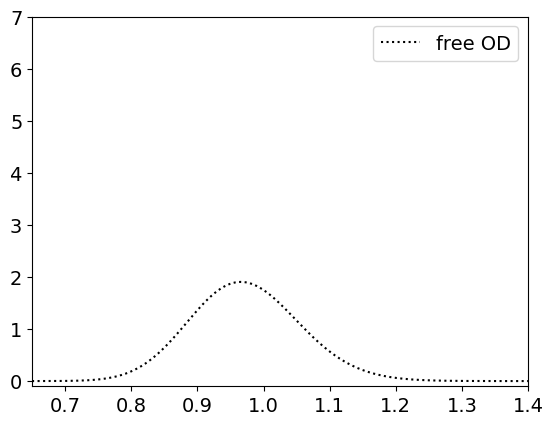

In [10]:
#plt.plot(free_oh[0]*au_to_ang,free_oh[1],label='free OH')
plt.plot(free_od[0]*au_to_ang,free_od[1]*-1,color='black',linestyle='dotted',label='free OD')
plt.ylim(-0.1,7)
plt.legend()
plt.xlim(0.65,1.4)
plt.show()

In [304]:
calc_dist_stats(['h9o5_3_1_h2o_guided_sim_0_50k_walkers_50k-100k_timesteps'],
                'bond_length',
                [[3,5]])

(0.9749757423744849, 0.0, 0.16013675619298207, 0.0)

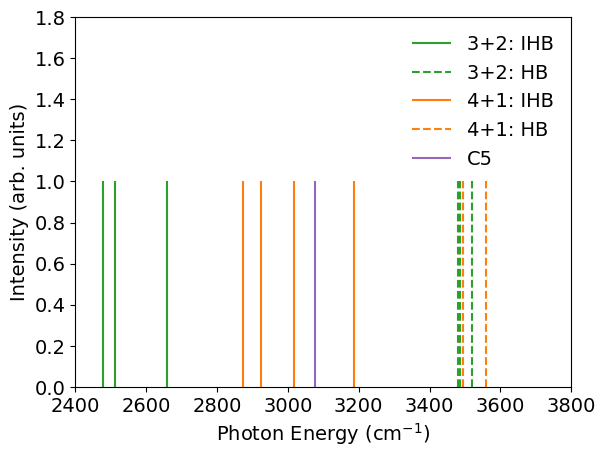

In [293]:
three_two_freq_list = [2659,2513,2477]
three_two_2 = [3520,3485,3481]

four_one_freq_list = [3187,3016,2923,2872]
four_one_2 = [3559,3493]

c5_freq_list = [3078]

plt.vlines(three_two_freq_list,0,1,color='tab:green',label='3+2: IHB')
plt.vlines(three_two_2,0,1,color='tab:green',linestyle = 'dashed', label='3+2: HB')

plt.vlines(four_one_freq_list,0,1,color='tab:orange',label = '4+1: IHB')
plt.vlines(four_one_2,0,1,color='tab:orange',linestyle='dashed', label = '4+1: HB')

plt.vlines(c5_freq_list,0,1,color='tab:purple', label='C5')

plt.xlim(2400,3800)
plt.ylim(0,1.8)
plt.xlabel(r'Photon Energy (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.legend(frameon=False)
plt.show()

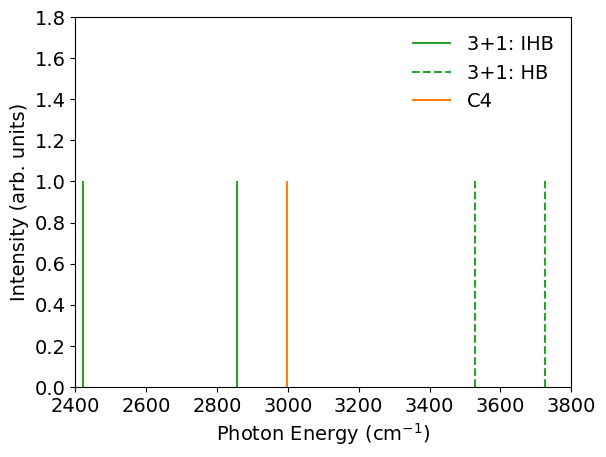

In [308]:
three_one_freq_list = [2422,2857]
three_one_2 = [3528, 3726]

c4_freq_list = [2998]

plt.vlines(three_one_freq_list,0,1,color='tab:green',label='3+1: IHB')
plt.vlines(three_one_2,0,1,color='tab:green',linestyle = 'dashed', label='3+1: HB')

plt.vlines(c4_freq_list,0,1,color='tab:orange', label='C4')

plt.xlim(2400,3800)
plt.ylim(0,1.8)
plt.xlabel(r'Photon Energy (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.legend(frameon=False)
plt.show()

In [ ]:
#plt.hlines(23649,0,260,color='darkgray')
#plt.hlines(23880,0,260,color='darkgray')

#4+1
plt.vlines(161.9,29172-12,29172+12,color='black')
plt.scatter(161.9,29172,color='tab:red',marker='s',s=120,alpha=0.7,facecolors='none',label='4+1: Unguided')

plt.vlines(90.2,23616-3,23616+3,color='black')
plt.scatter(90.2,23616,color='tab:red',marker='s',s=120,alpha=0.7,label='4+1: Guided')

#Old 3+1
plt.vlines(144.1,23835-13,23835+13,color='black')
plt.scatter(144.1,23835,color='tab:red',marker='^',s=120,alpha=0.7,facecolors='none',label='Old 3+1: Unguided')

plt.vlines(144.1,23796-7,23796+7,color='black')
plt.scatter(144.1,23796,color='tab:red',marker='^',s=120,alpha=0.7,label='Old 3+1: Guided')

#New C4
plt.vlines(102.5,23669-16,23669+16,color='black')
plt.scatter(102.5,23669,color='tab:purple',marker='s',s=120,alpha=0.7,facecolors='none',label='New C4: Unguided')

plt.vlines(102.5,23671-8,23671+8,color='black')
plt.scatter(102.5,23671,color='tab:purple',marker='s',s=120,alpha=0.7,label='New C4: Guided')

#New 3+1
plt.vlines(116.8,23778-7,23778+7,color='black')
plt.scatter(116.8,23778,color='tab:purple',marker='^',s=120,alpha=0.7,facecolors='none',label='New 3+1: Unguided')

plt.vlines(116.8,23759-5,23759+5,color='black')
plt.scatter(116.8,23759,color='tab:purple',marker='^',s=120,alpha=0.7,label='New 3+1: Guided')

plt.legend(fontsize=11,frameon=False,loc='upper left')
plt.xlim(60,160)
plt.yticks(np.arange(23600,23900,50))
plt.xlabel(r'MAE (/cm$^{-1}$)')
plt.ylabel(r'ZPE (/cm$^{-1}$)')
plt.show()

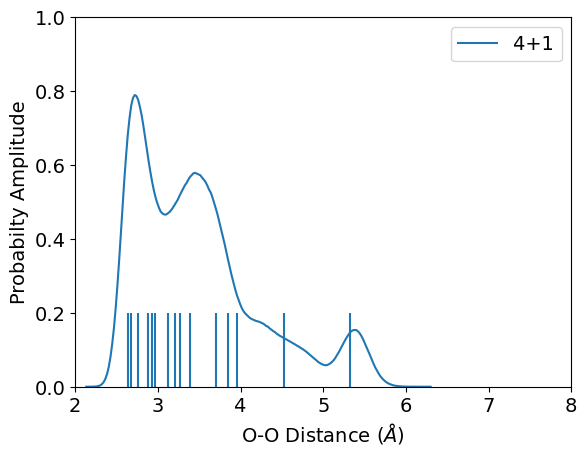

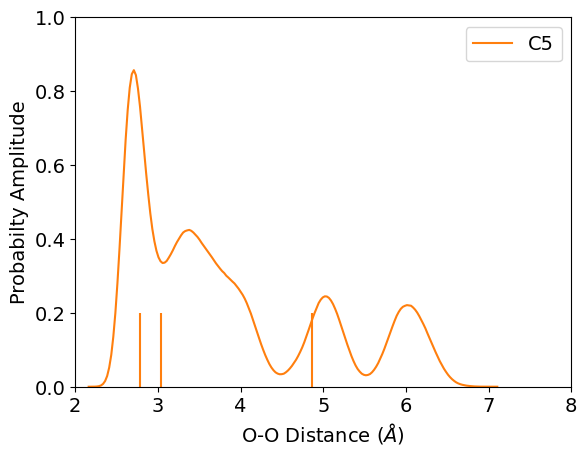

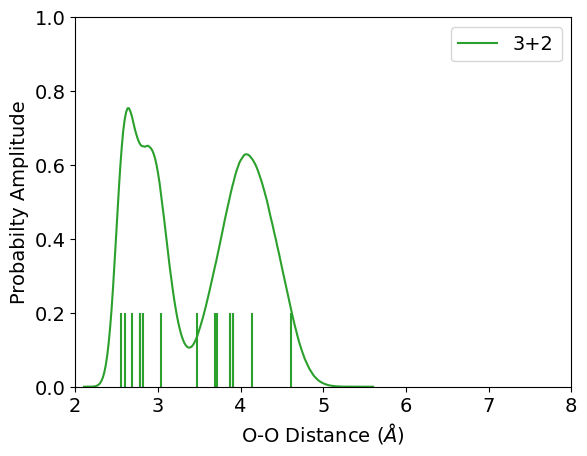

In [11]:
coords = np.load('./h11o6_4_1_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_cds.npy')
dws = np.load('./h11o6_4_1_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_dws.npy')

#coords = np.load('./h11o6/training_sets/h11o6_mobml_90_test_cds_4_1.npy')

coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

analyzer = pv.AnalyzeWfn(coords)

OOs = [[0,3],[0,6],[0,9],[0,12],[0,15],[3,6],[3,9],[3,12],[3,15],[6,9],[6,12],[6,15],[9,12],[9,15],[12,15]]

oo_cumulative = []
total_dws = []
for pair in OOs:
    bond_length = analyzer.bond_length(pair[0],pair[1])
    oo_cumulative.append(bond_length)
    total_dws.append(dws)

oo_total = np.concatenate(oo_cumulative)
total_dws = np.concatenate(total_dws)

n, bins = np.histogram(oo_total,weights=None,bins=200,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

oo_eq_4_1 = [3.266,5.322,3.212,4.528,2.758,3.385,3.951,2.963,2.637,3.844,3.124,2.877,2.923,2.679,3.708]

plt.vlines(oo_eq_4_1,0,0.2,color='tab:blue')
plt.plot(bin_centers,n,label='4+1',color='tab:blue')
plt.legend()
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

coords = np.load('./h11o6_c5_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_cds.npy')
dws = np.load('./h11o6_c5_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_dws.npy')

#coords = np.load('./h11o6/training_sets/h11o6_mobml_90_test_cds_c5.npy')

coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

analyzer = pv.AnalyzeWfn(coords)

OOs = [[0,3],[0,6],[0,9],[0,12],[0,15],[3,6],[3,9],[3,12],[3,15],[6,9],[6,12],[6,15],[9,12],[9,15],[12,15]]

oo_cumulative = []
total_dws = []
for pair in OOs:
    bond_length = analyzer.bond_length(pair[0],pair[1])
    oo_cumulative.append(bond_length)
    total_dws.append(dws)

oo_total = np.concatenate(oo_cumulative)
total_dws = np.concatenate(total_dws)

n, bins = np.histogram(oo_total,weights=None,bins=200,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

oo_eq_c5 = [3.198,4.946,3.102,5.112,2.818,2.923,4.756,4.962,2.742,4.535,3.036,2.804,2.933,2.742,2.836]
oo_eq_c5_ave = [3.0384,2.7884,4.8622]

plt.vlines(oo_eq_c5_ave,0,0.2,color='tab:orange')
plt.plot(bin_centers,n,label='C5',color='tab:orange')

plt.legend()
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

coords = np.load('./h11o6_3_2_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_cds.npy')
dws = np.load('./h11o6_3_2_h2o_guided_dist_65_sim_2_50k_walkers_50k-100k_timesteps_dws.npy')

#coords = np.load('./h11o6/training_sets/h11o6_mobml_90_test_cds_3_2.npy')

coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

analyzer = pv.AnalyzeWfn(coords)

OOs = [[0,3],[0,6],[0,9],[0,12],[0,15],[3,6],[3,9],[3,12],[3,15],[6,9],[6,12],[6,15],[9,12],[9,15],[12,15]]

oo_cumulative = []
total_dws = []
for pair in OOs:
    bond_length = analyzer.bond_length(pair[0],pair[1])
    oo_cumulative.append(bond_length)
    total_dws.append(dws)

oo_total = np.concatenate(oo_cumulative)
total_dws = np.concatenate(total_dws)

n, bins = np.histogram(oo_total,weights=None,bins=200,density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

oo_eq_3_2 = [4.137,3.031,3.716,4.610,2.682,3.474,3.872,2.780,2.596,3.910,2.783,3.905,2.821,2.557,3.686]

plt.vlines(oo_eq_3_2,0,0.2,color='tab:green')
plt.plot(bin_centers,n,label='3+2',color='tab:green')

plt.legend()
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

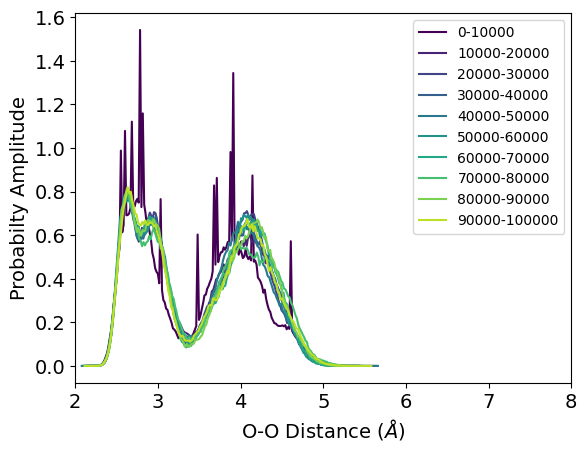

In [11]:
starts = np.arange(0,100000,10000)

# Choose a colormap (e.g., viridis, plasma, inferno, magma, cividis, etc.)
cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = [cmap(i / len(starts)) for i in range(len(starts))]

for i in range(len(starts)):

    snapshots = np.arange(starts[i],starts[i]+5000,500)

    tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
    coords, weights = tutorial_sim.get_wfns(snapshots)
    coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    analyzer = pv.AnalyzeWfn(coords)

    OOs = [[0,3],[0,6],[0,9],[0,12],[0,15],[3,6],[3,9],[3,12],[3,15],[6,9],[6,12],[6,15],[9,12],[9,15],[12,15]]

    oo_cumulative = []
    total_dws = []
    for pair in OOs:
        bond_length = analyzer.bond_length(pair[0],pair[1])
        oo_cumulative.append(bond_length)
        total_dws.append(weights)

    oo_total = np.concatenate(oo_cumulative)
    total_dws = np.concatenate(total_dws)

    n, bins = np.histogram(oo_total,weights=total_dws,bins=200,density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    oo_eq_c5_ave = [3.0384,2.7884,4.8622]

    #oo_eq_3_2 = [4.137,3.031,3.716,4.610,2.682,3.474,3.872,2.780,2.596,3.910,2.783,3.905,2.821,2.557,3.686]
    oo_eq_4_1 = [3.266,5.322,3.212,4.528,2.758,3.385,3.951,2.963,2.637,3.844,3.124,2.877,2.923,2.679,3.708]

    #plt.vlines(oo_eq_c5_ave,0,0.2,color='tab:orange')
    #plt.vlines(oo_eq_4_1,0,0.2,color='magenta')
    plt.plot(bin_centers,n,color=colors[i],label=f'{starts[i]}-{starts[i]+10000}')

plt.legend(fontsize=10)
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
#plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

c:\Users\gjaco\OneDrive\Documents\UW\McCoy Group\Machine Learning\nn_dmc\src\nn_dmc\model_analysis.py:73: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  output_regular = torch.tensor([(10**(j))-100 for j in output])
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = 

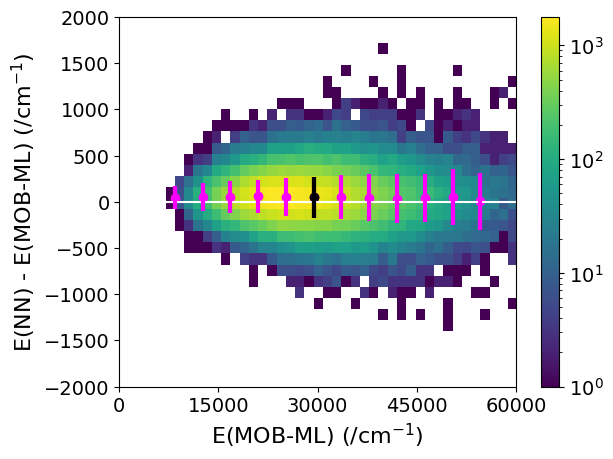

MAE: 171.16, average error: 50.14


In [5]:
plot_2d_pred_errors('h11o6',
                    './h11o6/models/h11o6_c5_and_4_1_5_reg_4mill_NN_model_450hidden_1e-6_decay_molec_atom_sorted_revised_standardized_0.pth',
                    './h11o6/training_sets/h11o6_mobml_10_test_molec_atom_sort_revised_X_4_1_new_5_reg_c5_and_4_1_4mill_standardized.npy',
                    './h11o6/training_sets/h11o6_mobml_10_test_y_4_1_new.npy')

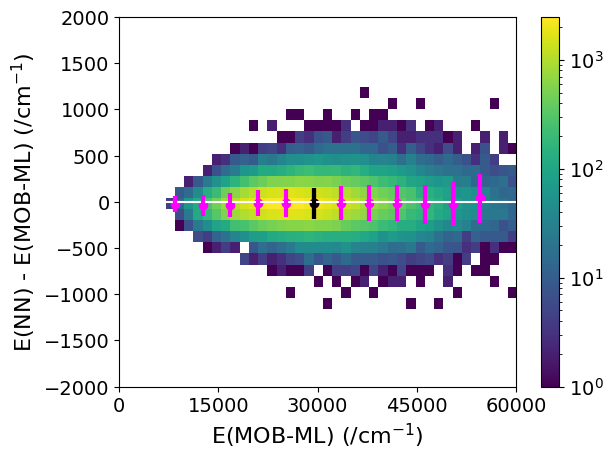

MAE: 126.77, average error: -17.60


In [6]:
plot_2d_pred_errors('h11o6',
                    './h11o6/models/h11o6_c5_and_4_1_5_reg_4mill_NN_model_450hidden_1e-6_decay_molec_atom_sorted_revised_standardized_0.pth',
                    './h11o6/training_sets/h11o6_mobml_10_test_molec_atom_sort_revised_X_c5_new_5_reg_c5_and_4_1_4mill_standardized.npy',
                    './h11o6/training_sets/h11o6_mobml_10_test_y_c5_new.npy')

c:\Users\gjaco\OneDrive\Documents\UW\McCoy Group\Machine Learning\nn_dmc\src\nn_dmc\model_analysis.py:73: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  output_regular = torch.tensor([(10**(j))-100 for j in output])
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = 

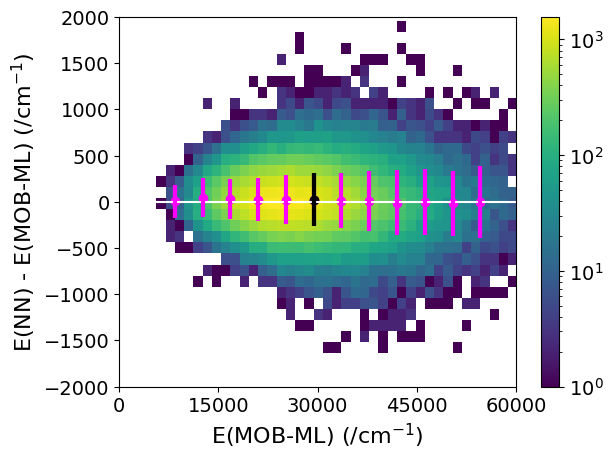

MAE: 209.46, average error: 16.32


In [99]:
plot_2d_pred_errors('h11o6',
                    './h11o6/models/h11o6_3_2_5_reg_no_B_NN_model_450hidden_1e-6_decay_molec_atom_sorted_revised_standardized_0.pth',
                    './h11o6/training_sets/h11o6_mobml_10_test_molec_atom_sort_revised_X_3_2_new_5_reg_no_B_standardized.npy',
                    './h11o6/training_sets/h11o6_mobml_10_test_y_3_2_new.npy')

In [94]:
analyzer = pv.AnalyzeWfn(h11o6_4_1_total_cds)

oh_pairs = [[[0,1],[15,1]],[[3,4],[15,4]],[[6,8],[15,8]],[[9,11],[15,11]],[[12,13],[9,13]],[[12,14],[3,14]]]

total_transfers = []
total_transfer_list = []
total_transfer_inds = []

for pair in oh_pairs:
    transfers = 0
    transfer_list = []
    transfer_inds = []
    donor = analyzer.bond_length(pair[0][0],pair[0][1])
    acceptor = analyzer.bond_length(pair[1][0],pair[1][1])

    for i in range(len(h11o6_4_1_total_cds)):
        if donor[i] > acceptor[i]:
            transfers += 1
            transfer_list.append(h11o6_4_1_total_cds[i])
            transfer_inds.append(i)

    total_transfers.append(transfers/len(h11o6_4_1_total_cds))
    total_transfer_list.append(transfer_list)
    total_transfer_inds.append(transfer_inds)

In [95]:
t_total = 0
for t in total_transfers:
    print(t*100)
    t_total += t

print(t_total*100)

39.644757437195565
2.111398687672122
0.22022102613526306
0.0415578388029448
0.004143944040179681
0.003907147237883699
42.025986081083964


(-1500.0, 2000.0)

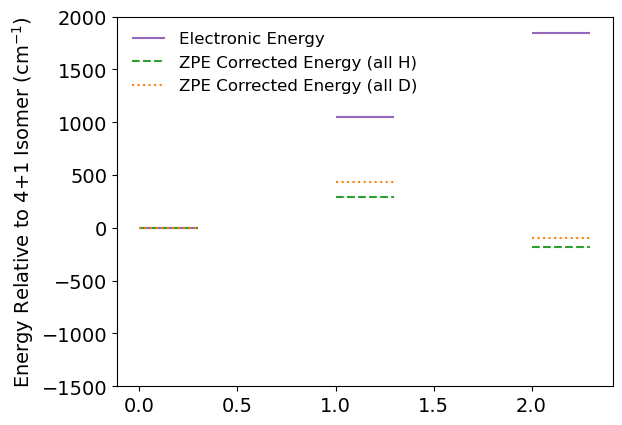

In [26]:
plt.hlines([0, 1051, 1847], [0, 1, 2], [0.3, 1.3, 2.3], color='tab:purple', label='Electronic Energy')
plt.hlines([0, 289, -179], [0, 1, 2], [0.3, 1.3, 2.3], color='tab:green', linestyle='dashed', label='ZPE Corrected Energy (all H)')
plt.hlines([0, 433, -97], [0, 1, 2], [0.3, 1.3, 2.3], color='tab:orange', linestyle='dotted',label='ZPE Corrected Energy (all D)')

plt.legend(fontsize=12,loc='upper left',frameon=False)
plt.ylabel(r'Energy Relative to 4+1 Isomer (cm$^{-1}$)')
plt.ylim(-1500,2000)

(-100.0, 200.0)

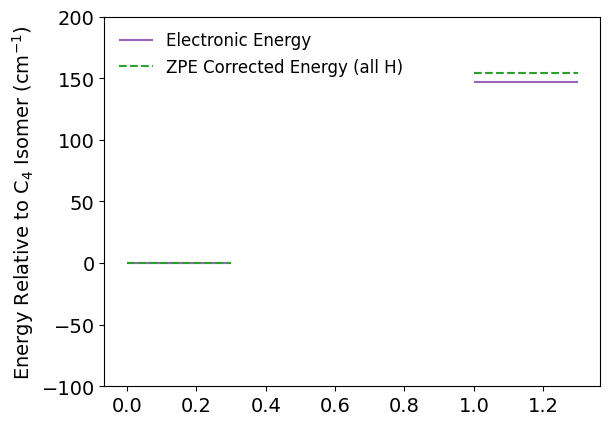

In [143]:
plt.hlines([0, 147], [0, 1], [0.3, 1.3], color='tab:purple', label='Electronic Energy')
plt.hlines([0, 23779-23625], [0, 1], [0.3, 1.3], color='tab:green', linestyle='dashed', label='ZPE Corrected Energy (all H)')
#plt.hlines([0, 131], [0, 1], [0.3, 1.3], color='tab:orange', linestyle='dotted',label='ZPE Corrected Energy (all D)')

plt.legend(fontsize=12,loc='upper left',frameon=False)
plt.ylabel(r'Energy Relative to C$_{4}$ Isomer (cm$^{-1}$)')
plt.ylim(-100,200)

In [7]:
filename = './h11o6/h11o6_0_training_528ts.hdf5'

with h5py.File(filename, "r") as f:
    coords = np.array(f['coords'])

In [8]:
coords.shape

(184, 17, 3)

In [50]:
h11o6_3_2_min_final = np.concatenate([coords,coords])

In [5]:
728+193

921

In [9]:
np.save('./h11o6/h11o6_4_1_reg_528_start.npy',coords)

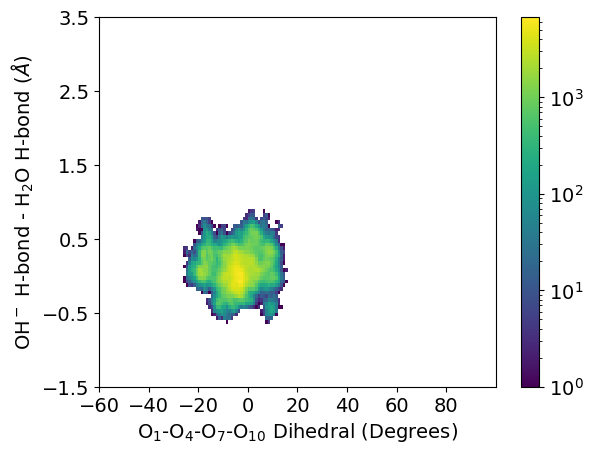

In [94]:
c5_guided_dihedrals = []
c5_guided_dws = []

c5_guided_rmsd = []

for i in range(1):

    #snapshots = np.arange(i,i+10000,500)

    #tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/c5_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/unguided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
    #coords, weights = tutorial_sim.get_wfns(snapshots)
    #coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    #coords = train_cds
    coords = np.load('./h11o6/training_sets/h11o6_mobml_5_reg_training_cds_c5.npy')
    coords = pv.Constants.convert(coords,'angstroms',to_AU=False)

    for j in np.arange(0,len(train_cds_1),1000000):

        #cds = train_cds_5

        analyzer = pv.AnalyzeWfn(coords)

        dihedrals = analyzer.dihedral(0,3,6,9)

        dihedrals = np.rad2deg(dihedrals)

        c5_guided_dihedrals.append(dihedrals)
        #c5_guided_dws.append(weights)

        w1 = analyzer.bond_length(0,15)
        w1w2 = analyzer.bond_length(0,3)
        w1w3 = analyzer.bond_length(0,6)
        w1w4 = analyzer.bond_length(0,9)
        w1w5 = analyzer.bond_length(0,12)

        w2 = analyzer.bond_length(3,15)
        w2w3 = analyzer.bond_length(3,6)
        w2w4 = analyzer.bond_length(3,9)
        w2w5 = analyzer.bond_length(3,12)

        w3 = analyzer.bond_length(6,15)
        w3w4 = analyzer.bond_length(6,9)
        w3w5 = analyzer.bond_length(6,12)

        w4 = analyzer.bond_length(9,15)
        w4w5 = analyzer.bond_length(9,12)

        w5 = analyzer.bond_length(12,15)

        waters = np.array([w1,w2,w3,w4,w5])
        max_w_inds = np.argmax(waters,axis=0)
        max_w = np.max(waters,axis=0)
        
        diffs = []
        for w in range(len(w1)):
            if max_w_inds[w] == 0:
                if w1w2[w] > w1w4[w]:
                    diffs.append(max_w[w] - w1w4[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 1:
                if w1w2[w] > w2w3[w]:
                    diffs.append(max_w[w] - w2w3[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 2:
                if w2w3[w] > w3w5[w]:
                    diffs.append(max_w[w] - w3w5[w])
                else:
                    diffs.append(max_w[w] - w2w3[w])
            elif max_w_inds[w] == 3:
                if w1w4[w] > w4w5[w]:
                    diffs.append(max_w[w] - w4w5[w])
                else:
                    diffs.append(max_w[w] - w1w4[w])
            else:
                if w3w5[w] > w4w5[w]:
                    diffs.append(max_w[w] - w4w5[w])
                else:
                    diffs.append(max_w[w] - w3w5[w])

        c5_guided_rmsd.append(diffs)

        """dihedral_inds = np.argsort(waters,axis=0)[:4,:]

        dihedrals = []
        for c in range(len(coords)):
            analyzer = pv.AnalyzeWfn(coords[c])
            dihedral = analyzer.dihedral(dihedral_inds[:,c][0],dihedral_inds[:,c][1],dihedral_inds[:,c][2],dihedral_inds[:,c][3])
            dihedrals.append(dihedral)

        dihedrals = np.rad2deg(np.array(dihedrals))

        c5_guided_dihedrals.append(dihedrals)"""
        #c5_guided_dws.append(weights)

        c5_dihedrals = np.concatenate(c5_guided_dihedrals)
        #c5_dws = np.concatenate(c5_guided_dws)
        c5_rmsd = np.concatenate(c5_guided_rmsd)

        fig, ax = plt.subplots()

        h = ax.hist2d(dihedrals,diffs,bins=[np.arange(-60,100,1),np.arange(-1.5,3.5,0.05)],norm=LogNorm(vmin=1),cmap = 'viridis')

        fig.colorbar(h[3], ax=ax)

        #plt.scatter(-18.9,0.84,color='magenta')

        plt.xlim(-60,100)
        plt.xticks(np.arange(-60,100,20))
        plt.ylim(-1.5,3.5)
        plt.yticks(np.arange(-1.5,4.5,1))
        plt.xlabel(r'O$_1$-O$_4$-O$_7$-O$_{10}$ Dihedral (Degrees)')
        plt.ylabel(r'OH$^-$ H-bond - H$_2$O H-bond ($\AA$)')

        plt.show()


In [86]:
c5_rmsd.shape

(3886320,)

In [52]:
inds = np.argsort(waters,axis=0)[:4,:]
inds[:,0]

array([2, 1, 0, 3], dtype=int64)

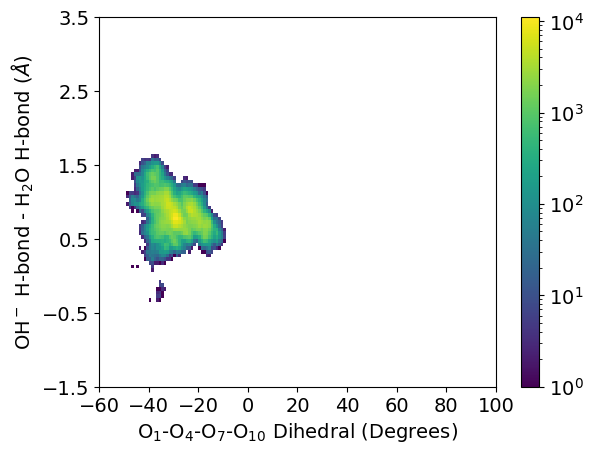

In [93]:
four_one_guided_dihedrals = []
four_one_guided_dws = []

four_one_guided_rmsd = []

for i in range(1):

    #snapshots = np.arange(i,i+10000,500)

    #tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/4_1_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/unguided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
    #coords, weights = tutorial_sim.get_wfns(snapshots)
    #coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    coords = np.load('./h11o6/training_sets/h11o6_mobml_5_reg_training_cds_4_1.npy')

    for j in np.arange(0,len(train_cds_1),1000000):
        #coords = train_cds_5
        coords = pv.Constants.convert(coords,'angstroms',to_AU=False)

        analyzer = pv.AnalyzeWfn(coords)

        dihedrals = analyzer.dihedral(0,3,6,9)

        dihedrals = np.rad2deg(dihedrals)

        four_one_guided_dihedrals.append(dihedrals)
        #c5_guided_dws.append(weights)

        w1 = analyzer.bond_length(0,15)
        w1w2 = analyzer.bond_length(0,3)
        w1w3 = analyzer.bond_length(0,6)
        w1w4 = analyzer.bond_length(0,9)
        w1w5 = analyzer.bond_length(0,12)

        w2 = analyzer.bond_length(3,15)
        w2w3 = analyzer.bond_length(3,6)
        w2w4 = analyzer.bond_length(3,9)
        w2w5 = analyzer.bond_length(3,12)

        w3 = analyzer.bond_length(6,15)
        w3w4 = analyzer.bond_length(6,9)
        w3w5 = analyzer.bond_length(6,12)

        w4 = analyzer.bond_length(9,15)
        w4w5 = analyzer.bond_length(9,12)

        w5 = analyzer.bond_length(12,15)

        waters = np.array([w1,w2,w3,w4,w5])
        max_w_inds = np.argmax(waters,axis=0)
        max_w = np.max(waters,axis=0)
        
        diffs = []
        for w in range(len(w1)):
            if max_w_inds[w] == 0:
                if w1w2[w] > w1w4[w]:
                    diffs.append(max_w[w] - w1w4[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 1:
                if w1w2[w] > w2w3[w]:
                    diffs.append(max_w[w] - w2w3[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 2:
                if w2w3[w] > w3w4[w]:
                    diffs.append(max_w[w] - w3w4[w])
                else:
                    diffs.append(max_w[w] - w2w3[w])
            elif max_w_inds[w] == 3:
                if w1w4[w] > w3w4[w]:
                    diffs.append(max_w[w] - w3w4[w])
                else:
                    diffs.append(max_w[w] - w1w4[w])
            else:
                if w2w5[w] > w4w5[w]:
                    diffs.append(max_w[w] - w4w5[w])
                else:
                    diffs.append(max_w[w] - w2w5[w])

        four_one_guided_rmsd.append(diffs)

        four_one_dihedrals = np.concatenate(four_one_guided_dihedrals)
        #four_one_dws = np.concatenate(four_one_guided_dws)
        four_one_rmsd = np.concatenate(four_one_guided_rmsd)

        fig, ax = plt.subplots()

        h = ax.hist2d(dihedrals,diffs,bins=[np.arange(-60,100,1),np.arange(-1.5,3.5,0.05)],norm=LogNorm(vmin=1),cmap = 'viridis')

        fig.colorbar(h[3], ax=ax)

        #plt.scatter(-18.9,0.84,color='magenta')

        plt.xlim(-60,100)
        plt.xticks(np.arange(-60,120,20))
        plt.ylim(-1.5,3.5)
        plt.yticks(np.arange(-1.5,4.5,1))
        plt.xlabel(r'O$_1$-O$_4$-O$_7$-O$_{10}$ Dihedral (Degrees)')
        plt.ylabel(r'OH$^-$ H-bond - H$_2$O H-bond ($\AA$)')

        plt.show()

In [99]:
for j in np.arange(0,100000,10000):
    print(j, j+10000)

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
70000 80000
80000 90000
90000 100000


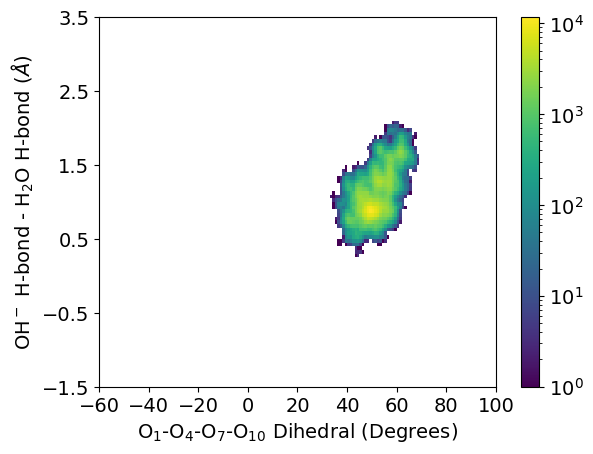

In [95]:
three_two_guided_dihedrals = []
three_two_guided_dws = []

three_two_guided_rmsd = []

for i in range(1):

    #snapshots = np.arange(i,i+10000,500)

    #tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/unguided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
    #coords, weights = tutorial_sim.get_wfns(snapshots)
    #coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    coords = np.load('./h11o6/training_sets/h11o6_mobml_5_reg_training_cds_3_2.npy')

    for j in np.arange(0,len(train_cds_2),1000000):
        #coords = train_cds_5
        coords = pv.Constants.convert(coords,'angstroms',to_AU=False)

        analyzer = pv.AnalyzeWfn(coords)

        dihedrals = analyzer.dihedral(0,3,12,9)

        dihedrals = np.rad2deg(dihedrals)

        three_two_guided_dihedrals.append(dihedrals)
        #three_two_guided_dws.append(weights)

        w1 = analyzer.bond_length(0,15)
        w1w2 = analyzer.bond_length(0,3)
        w1w3 = analyzer.bond_length(0,6)
        w1w4 = analyzer.bond_length(0,9)
        w1w5 = analyzer.bond_length(0,12)

        w2 = analyzer.bond_length(3,15)
        w2w3 = analyzer.bond_length(3,6)
        w2w4 = analyzer.bond_length(3,9)
        w2w5 = analyzer.bond_length(3,12)

        w3 = analyzer.bond_length(6,15)
        w3w4 = analyzer.bond_length(6,9)
        w3w5 = analyzer.bond_length(6,12)

        w4 = analyzer.bond_length(9,15)
        w4w5 = analyzer.bond_length(9,12)

        w5 = analyzer.bond_length(12,15)

        waters = np.array([w1,w2,w3,w4,w5])
        max_w_inds = np.argmax(waters,axis=0)
        max_w = np.max(waters,axis=0)
        
        diffs = []
        for w in range(len(w1)):
            if max_w_inds[w] == 0:
                if w1w2[w] > w1w4[w]:
                    diffs.append(max_w[w] - w1w4[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 1:
                if w1w2[w] > w2w4[w]:
                    diffs.append(max_w[w] - w2w4[w])
                else:
                    diffs.append(max_w[w] - w1w2[w])

            elif max_w_inds[w] == 2:
                if w1w3[w] > w2w3[w]:
                    diffs.append(max_w[w] - w2w3[w])
                else:
                    diffs.append(max_w[w] - w1w3[w])
            elif max_w_inds[w] == 3:
                if w1w4[w] > w2w4[w]:
                    diffs.append(max_w[w] - w2w4[w])
                else:
                    diffs.append(max_w[w] - w1w4[w])
            else:
                if w2w5[w] > w4w5[w]:
                    diffs.append(max_w[w] - w4w5[w])
                else:
                    diffs.append(max_w[w] - w2w5[w])

        three_two_guided_rmsd.append(diffs)

        three_two_dihedrals = np.concatenate(three_two_guided_dihedrals)
        #three_two_dws = np.concatenate(three_two_guided_dws)
        three_two_rmsd = np.concatenate(three_two_guided_rmsd)

        fig, ax = plt.subplots()

        h = ax.hist2d(dihedrals,diffs,bins=[np.arange(-60,100,1),np.arange(-1.5,3.5,0.05)],norm=LogNorm(vmin=1),cmap = 'viridis')

        fig.colorbar(h[3], ax=ax)

        #plt.scatter(-18.9,0.84,color='magenta')

        plt.xlim(-60,100)
        plt.xticks(np.arange(-60,120,20))
        plt.ylim(-1.5,3.5)
        plt.yticks(np.arange(-1.5,4.5,1))
        plt.xlabel(r'O$_1$-O$_4$-O$_7$-O$_{10}$ Dihedral (Degrees)')
        plt.ylabel(r'OH$^-$ H-bond - H$_2$O H-bond ($\AA$)')

        plt.show()

In [88]:
input_size = 136
hidden_size = 450
output_size = 1

model = nn.Sequential(nn.Linear(input_size, hidden_size, bias=True),
                    nn.BatchNorm1d(hidden_size),
                    nn.SiLU(),
                    nn.Dropout(),
                    nn.Linear(hidden_size, hidden_size, bias=True),
                    nn.BatchNorm1d(hidden_size),
                    nn.SiLU(),
                    nn.Dropout(),
                    nn.Linear(hidden_size, hidden_size, bias=True),
                    nn.BatchNorm1d(hidden_size),
                    nn.SiLU(),
                    nn.Dropout(),
                    nn.Linear(hidden_size, output_size,bias=True),
                    nn.ReLU()

)

#load the model's state dictionary from the saved file
model.load_state_dict(torch.load('./h11o6/models/h11o6_c5_5_reg_NN_model_450hidden_1e-6_decay_molec_atom_sorted_revised_standardized_0.pth',map_location=torch.device('cpu')))

# Put the model in evaluation mode (important if you're doing inference)
#model.to(DEVICE)
model.eval()

means = np.load('./h11o6/training_sets/h11o6_mobml_full_training_molec_atom_sort_revised_X_c5_5_reg_means.npy')

stds = np.load('./h11o6/training_sets/h11o6_mobml_full_training_molec_atom_sort_revised_X_c5_5_reg_stds.npy')

def unsorted_CM(original_coords, atomic_numbers):
    """
    Calculate the Coulomb matrices for a batch of molecules with the same atomic numbers.
    
    Parameters:
    molecule_coords (np.ndarray): An array of shape (n_molecules, n_atoms, 3) containing the Cartesian coordinates.
    atomic_numbers (np.ndarray): An array of shape (n_atoms,) containing the atomic numbers.

    Returns:
    np.ndarray: An array of lower triangles of the group-sorted coulomb matrices of shape (n_molecules, n_atoms, n_atoms).
    """
    molecule_coords = original_coords
    
    n_molecules, n_atoms, _ = molecule_coords.shape
    
    # Initialize the Coulomb matrices
    coulomb_matrices = np.zeros((n_molecules, n_atoms, n_atoms))
    
    # Compute pairwise distance matrices
    distance_matrices = np.linalg.norm(molecule_coords[:, :, np.newaxis] - molecule_coords[:, np.newaxis, :], axis=-1)

    # Calculate off-diagonal elements
    #Z_product = atomic_numbers[:, np.newaxis] * atomic_numbers[np.newaxis, :]
    with np.errstate(divide='ignore', invalid='ignore'):
        coulomb_matrices = 1 / distance_matrices
        coulomb_matrices[distance_matrices == 0] = 0  # Handle division by zero
    
    # Identify molecules with any close atom pairs
    mask = np.any(coulomb_matrices > 0.8, axis=(1, 2))
    bad_geoms = np.where(mask)[0].tolist()

    # Calculate diagonal elements
    diagonal_elements = atomic_numbers
    np.einsum('ijj->ij', coulomb_matrices)[:] = diagonal_elements
    
    lower_triangles = np.zeros((n_molecules, n_atoms * (n_atoms - 1) // 2))
    
    for a in range(n_molecules):

        lower_triangles[a] = coulomb_matrices[a][np.tril_indices(n_atoms, -1)]
    
    return lower_triangles, bad_geoms

def molec_atom_sorted_CM(original_coords, atomic_numbers):
    """
    Calculate the Coulomb matrices for a batch of molecules with the same atomic numbers.
    
    Parameters:
    molecule_coords (np.ndarray): An array of shape (n_molecules, n_atoms, 3) containing the Cartesian coordinates.
    atomic_numbers (np.ndarray): An array of shape (n_atoms,) containing the atomic numbers.

    Returns:
    np.ndarray: An array of lower triangles of the group-sorted coulomb matrices of shape (n_molecules, n_atoms, n_atoms).
    """
    molecule_coords = original_coords
    
    n_molecules, n_atoms, _ = molecule_coords.shape
    
    # Initialize the Coulomb matrices
    coulomb_matrices = np.zeros((n_molecules, n_atoms, n_atoms))
    
    # Compute pairwise distance matrices
    distance_matrices = np.linalg.norm(molecule_coords[:, :, np.newaxis] - molecule_coords[:, np.newaxis, :], axis=-1)
    
    # Calculate off-diagonal elements
    #Z_product = atomic_numbers[:, np.newaxis] * atomic_numbers[np.newaxis, :]
    with np.errstate(divide='ignore', invalid='ignore'):
        coulomb_matrices = 1 / distance_matrices
        coulomb_matrices[distance_matrices == 0] = 0  # Handle division by zero
    
    # Identify molecules with any close atom pairs
    mask = np.any(coulomb_matrices > 0.814, axis=(1, 2))
    bad_geoms = np.where(mask)[0].tolist()

    # Calculate diagonal elements
    diagonal_elements = atomic_numbers
    np.einsum('ijj->ij', coulomb_matrices)[:] = diagonal_elements
    
    groups = [[0,1,2], [3,4,5], [6,7,8], [9,10,11], [12,13,14], [15,16]]
    group_sizes = [3, 3, 3, 3, 3, 2]
    group_starts = [0, 3, 6, 9, 12, 15]
    
    lower_triangles = np.zeros((n_molecules, n_atoms * (n_atoms - 1) // 2))
  
    for a in range(n_molecules):
        reorder = []
        group_norms = []
        for i in range(len(group_sizes)):
            start = group_starts[i]
            end = start+group_sizes[i]
            reorder.append(np.argsort([np.linalg.norm(coulomb_matrices[a][j]) for j in range(start,end)])+start)
            
            group_norm = np.sum([np.linalg.norm(coulomb_matrices[a][j]) for j in range(start,end)])
            group_norms.append(group_norm)

        group_order = np.argsort(group_norms)

        sorted_indices = []
        for i in range(len(group_sizes)):
            sorted_indices.append(reorder[group_order[i]])

        sorted_CM = coulomb_matrices[a][:, np.concatenate(sorted_indices)][np.concatenate(sorted_indices), :]

        lower_tri = np.tril_indices(17, -1)
        
        lower_triangles[a] = sorted_CM[lower_tri]
    
    return lower_triangles, bad_geoms

def cart_to_pot(cds):
    atoms = np.array([8, 1, 1, 8, 1, 1, 8, 1, 1, 8, 1, 1, 8, 1, 1, 8, 1])
        
    features, bad_geoms = molec_atom_sorted_CM(cds,atoms)

    std_features = (features-means)/stds

    energy = model(torch.tensor(std_features,dtype=torch.float32))
    energy_unshifted = torch.tensor([(10**(i)-100) for i in energy])

    energy_values = energy_unshifted.detach().numpy().reshape(len(cds))
    energy_values[bad_geoms] = 1
    
    return energy_values

In [89]:
ffnn_energies = cart_to_pot(h11o6_c5_snapshot_cds_part)

In [50]:
cart_to_pot(h11o6_3_2_book_opt.reshape(1,17,3))

array([1309.3032], dtype=float32)

In [95]:
from h11o6.models.egnn.h11o6_egnn_training_4_1_2 import EGNNModelLN

# Pre-load model globally

atom_types = torch.tensor([8.0, 1.0, 1.0, 8.0, 1.0, 1.0,
8.0, 1.0, 1.0, 8.0, 1.0, 1.0,
8.0, 1.0, 1.0, 8.0, 1.0], dtype=torch.float32)

model = EGNNModelLN(n_atoms=17, atom_types_list=atom_types, hidden_dim=64, num_layers=3, n_freqs=3, coord_rescale=0.01)
ckpt = torch.load("h11o6/models/egnn/h11o6_egnn_c5_64_3_3_ln_best.pth", map_location="cpu")
model.load_state_dict(ckpt["model_state"])
model.eval()
mu = ckpt["mu"]
sigma = ckpt["sigma"]

# Pre-allocate atom types tensor

_atom_types_tensor = atom_types.unsqueeze(0).unsqueeze(-1)  # (1,17,1)

def cart_to_pot_fast(coords_np, batch_size=1024):
  """
  Optimized CPU evaluation of geometries in batches.
  coords_np: np.ndarray of shape (N,17,3)
  Returns: np.ndarray of energies in a.u.
  """
  N_total = coords_np.shape[0]
  energies = np.empty((N_total,), dtype=np.float32)
  
  with torch.inference_mode():
      for start in range(0, N_total, batch_size):
          end = min(start + batch_size, N_total)
          batch = torch.tensor(coords_np[start:end], dtype=torch.float32)  # (B,17,3)
          B = batch.shape[0]
  
          # expand atom types once per batch
          z = _atom_types_tensor.expand(B, -1, -1)  # (B,17,1)
  
          y_norm = model(batch, z).squeeze(-1)  # (B,)
  
          # store energies in-place
          energies[start:end] = (y_norm * sigma + mu).numpy()
  
  return energies  # convert to a.u.



In [201]:
cds_test = np.load('./h11o6/training_sets/h11o6_mobml_10_test_cds_3_2_new.npy')
y_test = np.load('./h11o6/training_sets/h11o6_mobml_10_test_y_3_2_new.npy')
energies_test = 10**y_test - 100

In [96]:
cds_test = h11o6_c5_snapshot_cds_part
energies_test = h11o6_c5_snapshot_energies

In [97]:
output = cart_to_pot_fast(cds_test)

In [56]:
output.shape

(41000,)

In [57]:
energies_test.shape

(41000,)

In [98]:
test_errors = output - energies_test

average_error = np.mean(test_errors)

In [99]:
test_MAE = np.mean(np.abs(test_errors))

In [100]:
test_MAE

np.float64(630.104019768029)

c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\gjaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

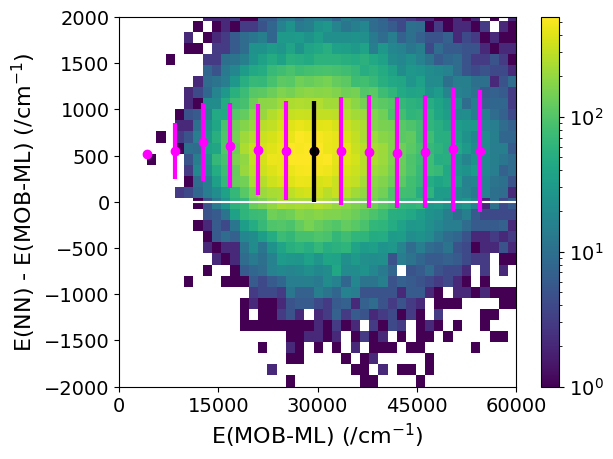

MAE: 630.10, average error: 551.56


In [101]:
bin_width = 1400
bin_height = 120
xlim = 60000
ylim = 2000
x_ticks = np.arange(0,75000,15000)

fig, ax = plt.subplots()

h = ax.hist2d(energies_test,test_errors,bins=[np.arange(0,xlim+bin_width,bin_width),np.arange(-ylim,ylim+bin_height,bin_height)],norm=LogNorm(vmin=1),cmap = 'viridis')

fig.colorbar(h[3], ax=ax)

plt.hlines(0,0,xlim,color = 'white',linewidth = 1.5)

steps = np.arange(0,41,3)

error_pairs = []
for i in range(len(test_errors)):
    error_pairs.append([energies_test[i],test_errors[i]])
    
bins = []
for i in range(len(h[1])-1):
    bin_elements = []
    for pair in error_pairs:
        if h[1][i] < pair[0] and h[1][i+1] > pair[0]:
            bin_elements.append(pair[1])
    bins.append(bin_elements)
    
bin_stats = []
for k in bins:
    bin_stats.append([np.mean(k),np.std(k)])

for j in steps:
    #mid_bin = (h[1][steps[j]]+h[1][steps[j+1]])/2
    plt.vlines(h[1][j],bin_stats[j][0]-bin_stats[j][1],bin_stats[j][0]+bin_stats[j][1],color = 'magenta',linewidth = 3)
    plt.scatter(h[1][j],bin_stats[j][0],color = 'magenta')

j = steps[7]
plt.vlines(h[1][j],bin_stats[j][0]-bin_stats[j][1],bin_stats[j][0]+bin_stats[j][1],color = 'black',linewidth = 3)
plt.scatter(h[1][j],bin_stats[j][0],color = 'black')
    
plt.xlim(0,xlim)
plt.xlabel('E(MOB-ML) (/cm$^{-1}$)',fontsize=16)
plt.ylabel(r'E(NN) - E(MOB-ML) (/cm$^{-1}$)',fontsize=16)
plt.ylim(-ylim,ylim)

plt.xticks(x_ticks)

plt.show()

print('MAE: {0:0.2f}, average error: {1:0.2f}'.format(test_MAE,average_error))


In [62]:
test_cds_4_1 = np.load('./h11o6/training_sets/h11o6_mobml_10_test_cds_3_2_new.npy')

analyzer_test = pv.AnalyzeWfn(test_cds_4_1)

train_cds_4_1 = np.load('./h11o6/training_sets/h11o6_mobml_full_training_cds_3_2_5_reg.npy')

analyzer_train = pv.AnalyzeWfn(train_cds_4_1)

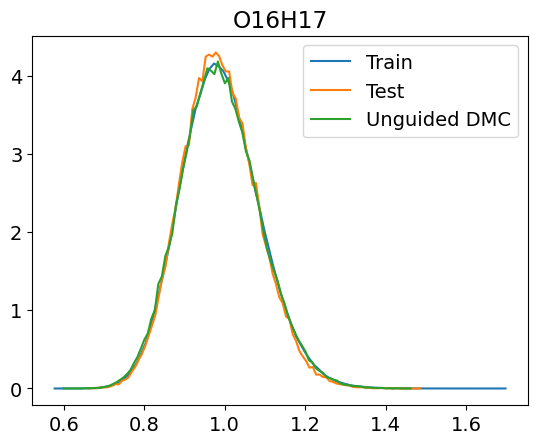

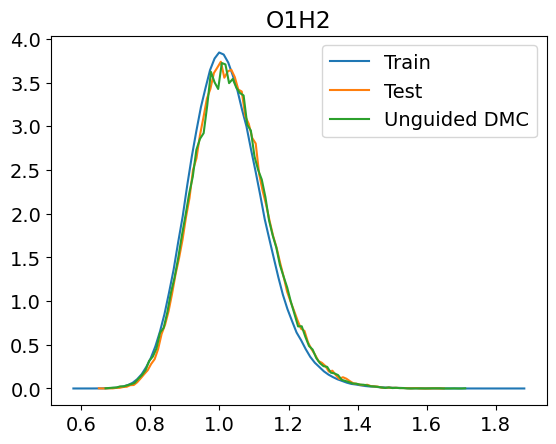

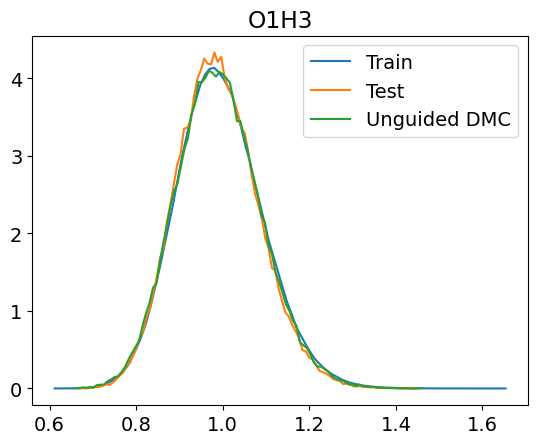

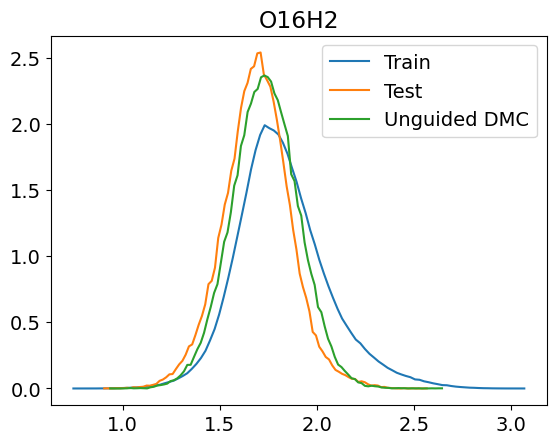

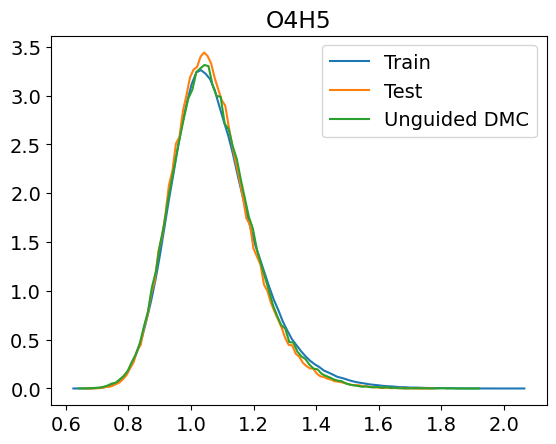

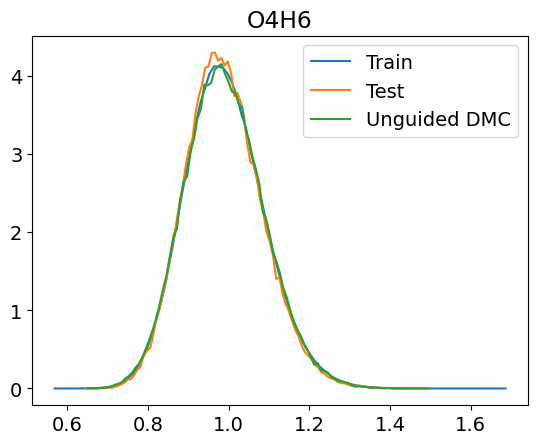

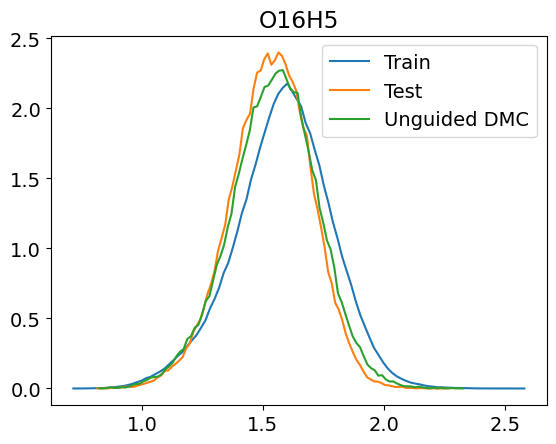

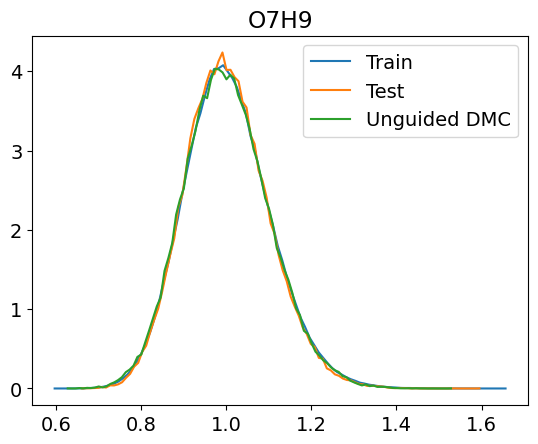

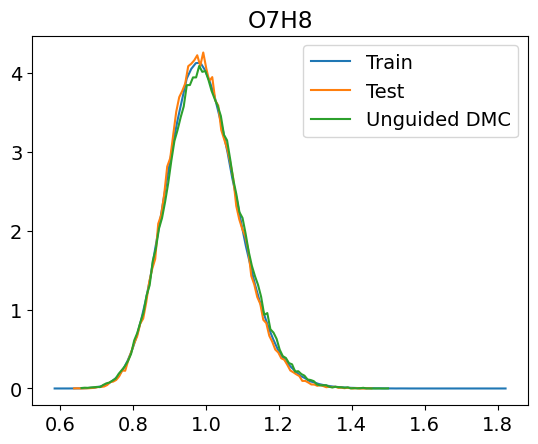

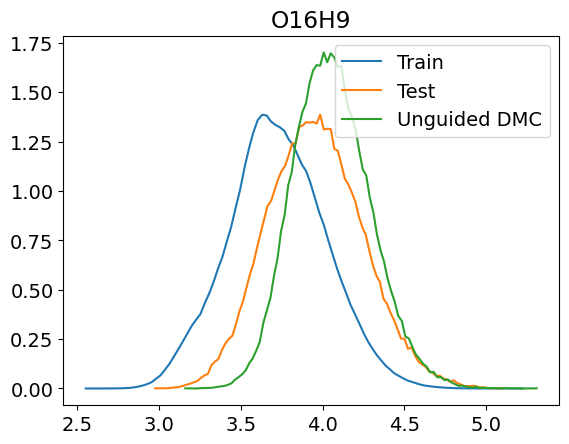

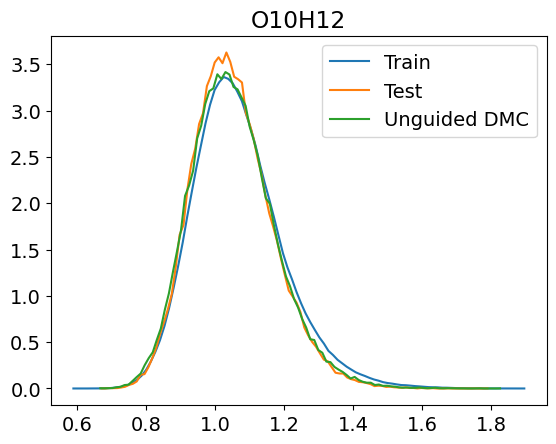

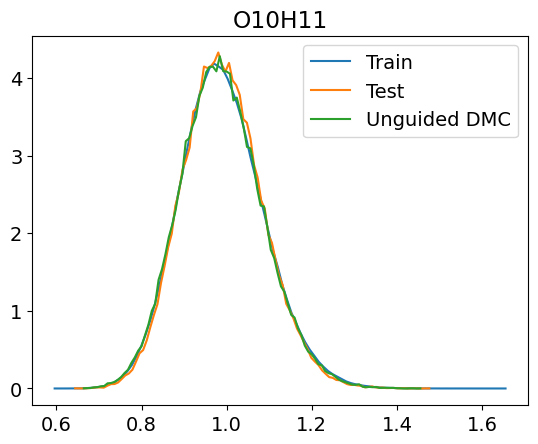

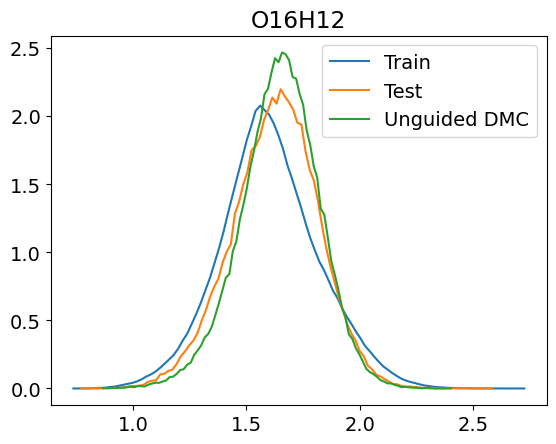

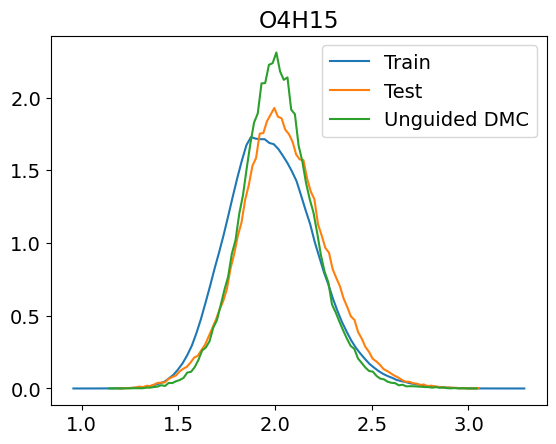

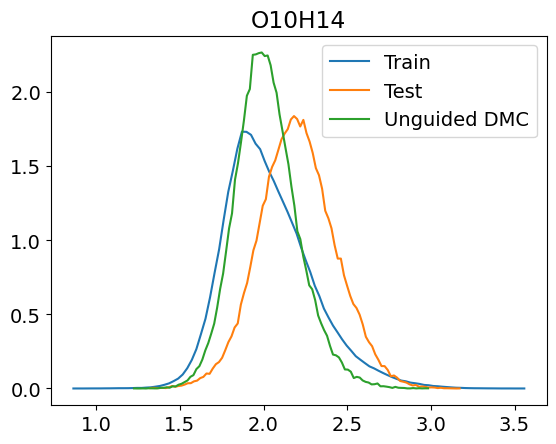

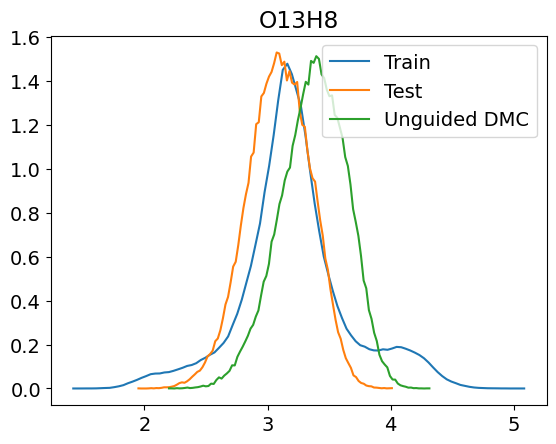

In [232]:
pairs = [[15,16],[0,1],[0,2],[15,1],[3,4],[3,5],[15,4],[6,8],[6,7],[15,8],[9,11],[9,10],[15,11],[3,14],[9,13],[12,7]]
for pair in pairs:
    bond_length = analyzer_train.bond_length(pair[0],pair[1])
    n, bins = np.histogram(bond_length*au_to_ang, bins = 100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, n, label = 'Train')

    bond_length = analyzer_test.bond_length(pair[0],pair[1])
    n, bins = np.histogram(bond_length*au_to_ang, bins = 100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, n, label = 'Test')

    bond_length = analyzer_dmc.bond_length(pair[0],pair[1])
    n, bins = np.histogram(bond_length*au_to_ang, bins = 100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers, n, label = 'Unguided DMC')

    plt.title(f'O{pair[0]+1}H{pair[1]+1}')
    plt.legend()
    plt.show()

In [226]:
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/dist_65_energy_1/unguided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns([75000])

In [ ]:
tutorial_sim = pv.SimInfo(f'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c5_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/H11O6_0_sim_info.hdf5')
coords, weights = tutorial_sim.get_wfns([20000])

In [22]:
int(np.argmax(weights))

36051

In [33]:
coords[83513]

array([[-4.49794917, -0.22785602,  2.60503126],
       [-3.690415  , -0.36248878,  0.79338619],
       [-5.82957442, -1.18357526,  2.46932352],
       [ 2.00275939,  2.49585395,  1.36882088],
       [ 0.8126537 ,  1.34165662,  0.66520776],
       [ 1.73598705,  2.35602068,  2.97389572],
       [-1.26819821,  1.85499886,  5.62644898],
       [-2.79060065,  1.1020733 ,  4.4022527 ],
       [-0.84821765,  0.29532435,  6.30773158],
       [ 1.6373414 , -4.08958273, -2.1598893 ],
       [ 0.5724902 , -5.34848923, -1.41071369],
       [ 0.49035664, -2.98976574, -1.32959255],
       [ 5.80219216, -1.56936029,  0.22392084],
       [ 4.25434374, -2.71299819, -0.64297153],
       [ 5.20064657,  0.09161277,  0.34702103],
       [-1.6258846 , -0.6369988 , -1.03813661],
       [-1.62566235,  0.16897337, -2.59860065]])

In [44]:
save_xyz_file('./h11o6/geometries/h11o6_4_1_max_wt_guided_20kts.xyz',h11o6_atom_names,coords[70640]*au_to_ang)

In [231]:
analyzer_dmc = pv.AnalyzeWfn(coords)

In [224]:
np.save('./h11o6/training_sets/h11o6_c5_unguided_100k_125kts_snapshot.npy',coords)

ValueError: zero-dimensional arrays cannot be concatenated

In [38]:
-457.77843158*au_to_cm - energy_shift

18011.743088379502

In [40]:
cart_to_pot_fast(coords[83513].reshape(1,17,3))

array([16244.767], dtype=float32)

In [19]:
#book optimization
-457.85459788929717*au_to_cm - energy_shift

1295.1704331040382

In [21]:
h11o6_3_2_book_opt = np.array([-4.55703434, -0.30208288,  2.392099,   -3.39470993, -0.4298726,  0.82983697,
 -6.02608311, -1.30481959,  2.09764544,  2.15873081,  2.40807322,  1.44097777,
  0.83706098, 1.51695575,  0.48393076,  1.49975248, 2.50110669,  3.12864478,
 -1.27309151,  1.87728403,  5.86549257, -2.52070078,  1.25575116,  4.67079459,
 -0.50880591,  0.36533379,  6.50821378,  1.59616535, -4.1645709,  -2.04302658,
  0.88807164, -5.63445899, -1.27133533,  0.34343392, -2.75093229, -1.69462384,
  5.92144129, -1.48402031,  0.11250125,  4.65018657, -2.58902108, -0.59848354,
  4.99718638,  0.06330862,  0.41727383, -1.36104569, -0.40938528, -1.13109855,
 -1.89612977,  0.21321998, -2.7424962 ]).reshape(17,3)

In [22]:
save_xyz_file('./h11o6/geometries/h11o6_3_2_book_mobml_min.xyz',h11o6_atom_names,h11o6_3_2_book_opt*au_to_ang)

In [108]:
#new c5
-457.8510452237062*au_to_cm - energy_shift

2074.8904040306807

In [109]:
h11o6_3_2_up_down_current = np.array([-5.19012673,  2.48490874,  0.50049639, -4.16140358,  1.98024484, -0.94523101,
 -4.45108731,  1.57917835,  1.8824176,   0.4541031,   1.00087936,  2.58037763,
  0.02805151,  2.26507734,  1.34829982,  0.13499535, -0.57512938,  1.659691,
  3.29150457,  2.34962092, -3.21073588,  3.64891112,  1.70686639, -1.54980549,
  1.47643108,  1.99827471, -3.39986166, -0.11060966, -2.69757701, -0.84596281,
 -1.54241179, -3.81113789, -0.87347237, -0.82580123, -0.97768312, -1.91210566,
  3.15469913, -2.88953634, -5.10168342,  2.09084789, -3.07753297, -3.62635267,
  3.48686847, -1.10703686, -5.09747675, -1.69900569,  0.91067681, -3.17923094,
 -2.18977871, -0.01829788, -4.6611643 ]).reshape(17,3)

In [110]:
save_xyz_file('./h11o6/geometries/h11o6_3_2_up_down_current.xyz',h11o6_atom_names,h11o6_3_2_up_down_current*au_to_ang)

In [53]:
file = 'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c5_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/wfns/H11O6_1_wfn_79000ts.hdf5'

In [18]:
f = h5py.File(file, "r")
for key in f.keys():
       print(key)

coords
desc_wts


In [21]:
cds = f['coords']
weights = f['desc_wts']

In [149]:
max_cds = get_max_wt_wfn('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/EGNN_Data/c4_1_start/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided/1.0w_100000_walkers_100000t_1dt/wfns/H11O6_0_wfn_99500ts.hdf5')

In [150]:
save_xyz_file('./h11o6/geometries/h11o6_c4_1_guided_0_max_99kts.xyz',h11o6_atom_names,max_cds*au_to_ang)

In [42]:
max_cds

array([[-5.30163348e+00,  1.33958895e+00,  1.34995682e+00],
       [-4.68621721e+00,  1.26257949e+00, -2.64664997e-01],
       [-3.88050423e+00,  1.02711711e+00,  2.56017638e+00],
       [ 5.28136229e-01,  1.73492067e+00,  2.51601440e+00],
       [-2.91355802e-01,  2.05664705e+00,  8.44893924e-01],
       [ 7.01397323e-01,  1.17642243e-01,  2.03112749e+00],
       [ 3.23383738e+00,  2.15123850e+00, -3.29431511e+00],
       [ 3.48618499e+00,  2.32280176e+00, -1.62630467e+00],
       [ 1.29443237e+00,  2.00231039e+00, -3.02629470e+00],
       [-1.40493088e-01, -2.72352703e+00, -5.83036543e-01],
       [-1.48545410e+00, -3.93718595e+00, -7.87203725e-01],
       [-8.71943133e-01, -1.13169564e+00, -1.39311277e+00],
       [ 1.89323548e+00, -2.94505857e+00, -5.87445875e+00],
       [ 1.17016843e+00, -3.72026042e+00, -4.43485842e+00],
       [ 2.74929266e+00, -1.27568519e+00, -5.54204614e+00],
       [-1.94053174e+00,  9.16210497e-01, -2.93195318e+00],
       [-3.04609722e+00,  7.29321710e-05

In [44]:
cart_to_pot_fast(np.array([max_cds]))

array([10769.676], dtype=float32)

In [46]:
-457.79470595*au_to_cm - energy_shift

14439.931731969118

In [85]:
h11o6_c5_snapshot_cds = np.load('./h11o6/training_sets/h11o6_c5_unguided_100k_125kts_snapshot.npy')

In [186]:
h11o6_c5_snapshot_energies = []
for i in np.arange(0, len(h11o6_c5_snapshot_cds), 1000):
    try:
        energy = np.load(f'{path}/h11o6/training_sets/h11o6_snapshots/{i}-{i+1000}_c5_energies.npy')
        h11o6_c5_snapshot_energies.append(energy)
    except:
        print(f'Skipping {i}-{i+1000}')
        continue
h11o6_c5_snapshot_energies = np.concatenate(h11o6_c5_snapshot_energies)*au_to_cm - energy_shift

NameError: name 'h11o6_c5_snapshot_cds' is not defined

In [50]:
len(h11o6_3_2_snapshot_energies)

41000

In [87]:
first = h11o6_c5_snapshot_cds[:60000]
second = h11o6_c5_snapshot_cds[65000:79000]
h11o6_c5_snapshot_cds_part = np.concatenate([first,second])

In [76]:
h11o6_4_1_snapshot_cds_part.shape

(79000, 17, 3)

In [64]:
read_xyz_file('./h11o6/geometries/c5_isom_current.xyz')

array([[-4.99431104,  2.85356531,  1.49841384],
       [-3.78806373,  2.30121231,  0.1999704 ],
       [-4.13566831,  4.31098639,  2.14685086],
       [-0.25095006,  6.40975405,  0.3538017 ],
       [-0.494261  ,  4.76417524, -0.49091439],
       [ 1.53820153,  6.52965118,  0.53783766],
       [ 3.84723927,  2.25039946, -1.43581273],
       [ 4.43653887,  0.75193413, -0.60775798],
       [ 1.99715772,  2.00476222, -1.61003495],
       [-1.13982384, -2.96231938, -1.02941067],
       [-2.84682627, -3.49511431, -0.7852611 ],
       [-1.22542991, -1.0830078 , -1.35947127],
       [ 3.21907884, -4.20000279, -3.62898326],
       [ 1.62257543, -4.02975695, -2.72935147],
       [ 3.48620193, -2.54197808, -4.30008117],
       [-1.17129061,  1.82108788, -1.85099183],
       [-1.68117426,  2.10723635, -3.56327478]])